In [1]:
## Getting access to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Importing basic required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pty
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Reading dataset

df1 = pd.read_excel("/content/drive/MyDrive/Project_4/Clustering Clean Ads_Data-2.xlsx")

### Basic Analysis

In [4]:
df1.head() ## Top 5 rows of data

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [5]:
df1.tail()  ## Last 5 rows of data

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [6]:
df1.shape   ## Dimension of data

(23066, 19)

In [7]:
df1.columns  ## Names of columns of data

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [8]:
df1.info() ## Basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [9]:
df1[df1.duplicated()]  ## There are no duplicated values

Empty DataFrame
Columns: [Timestamp, InventoryType, Ad - Length, Ad- Width, Ad Size, Ad Type, Platform, Device Type, Format, Available_Impressions, Matched_Queries, Impressions, Clicks, Spend, Fee, Revenue, CTR, CPM, CPC]
Index: []

In [10]:
df1.isnull().sum()  ## Getting number of null values

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

* There are 4736 missing data in CTR, CPM and CPC columns.
* We can fill this missing values by the formula of CTR, CPM and CPC that are given to using the given data.
* CPM = (Total Campaign Spend / Number of Impressions) * 1,000
* CPC = Total Cost (spend) / Number of Clicks
* CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

In [11]:
## Filling the missing values

# CTR column
df1['CTR'].fillna((df1[df1['CTR'].isnull()]['Clicks'])/(df1[df1['CTR'].isnull()]['Impressions']),inplace=True)

# CPC column
df1['CPC'].fillna((df1[df1['CPC'].isnull()]['Spend'])/(df1[df1['CPC'].isnull()]['Clicks']),inplace=True)

# CPM column
df1['CPM'].fillna((((df1[df1['CPM'].isnull()]['Spend'])/(df1[df1['CPM'].isnull()]['Impressions']))*1000),inplace=True)

In [12]:
df1.isnull().sum()   ## No missing now

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [13]:
## Getting basic statistical summary

def summary(data):
  numerical_col = []
  categorical_col = []
  for col in data.columns:
    if data[col].dtype == "object":
      categorical_col.append(col)
    else:
      numerical_col.append(col)
  return data[numerical_col].describe(),data[categorical_col].describe()


In [14]:
summary(df1)

(        Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
 count  23066.000000  23066.000000   23066.000000           2.306600e+04   
 mean     385.163097    337.896037   96674.468048           2.432044e+06   
 std      233.651434    203.092885   61538.329557           4.742888e+06   
 min      120.000000     70.000000   33600.000000           1.000000e+00   
 25%      120.000000    250.000000   72000.000000           3.367225e+04   
 50%      300.000000    300.000000   72000.000000           4.837710e+05   
 75%      720.000000    600.000000   84000.000000           2.527712e+06   
 max      728.000000    600.000000  216000.000000           2.759286e+07   
 
        Matched_Queries   Impressions         Clicks         Spend  \
 count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
 mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
 std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
 min       1.000000e+00  1.000000e

### Analyzing Numerical and Categorical columns

In [15]:
numerical_col = []
categorical_col = []
for col in df1.columns:
  if df1[col].dtype == "object":
    categorical_col.append(col)
  else:
    numerical_col.append(col)

In [16]:
print(numerical_col)
print(categorical_col)

['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']
['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']


#### Analyzing numerical column

In [17]:
## Looking for outliers

def outliers(data):
  for i in numerical_col:
    plt.figure(figsize=(3,3))
    plt.title(i)
    sns.boxplot(df1[i])
    plt.show()
    q1 = np.percentile(list(data[i]),25)
    q3 = np.percentile(list(data[i]),75)
    IQR = (q3-q1)/2
    lower_bound = (q1-(1.5*IQR))
    upper_bound = (q3+(1.5*IQR))
    outlier = [x  for x in data[i] if (x < lower_bound) | (x > upper_bound)]
    print(f"outliers in {i} are\n{outlier}\ntotal number of outlier in {i} is {len(outlier)}")
    print("-----------------------------------------------------------------")

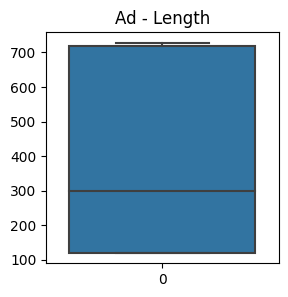

outliers in Ad - Length are
[]
total number of outlier in Ad - Length is 0
-----------------------------------------------------------------


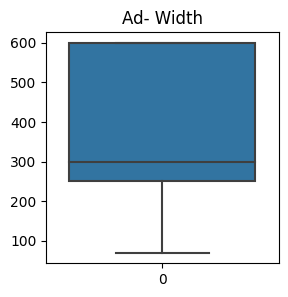

outliers in Ad- Width are
[]
total number of outlier in Ad- Width is 0
-----------------------------------------------------------------


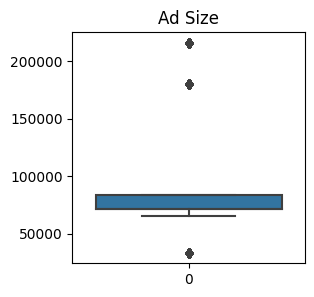

outliers in Ad Size are
[216000, 180000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 180000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 180000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 180000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 180000, 180000, 216000, 180000, 216000, 216000, 216000, 216000, 180000, 180000, 180000, 180000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 180000, 180000, 180000, 180000, 216000, 216000, 180000, 216000, 216000, 216000, 180000, 216000, 216000, 216000, 216000, 180000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 216000, 180000, 216000, 216000, 216000, 216000, 180000,

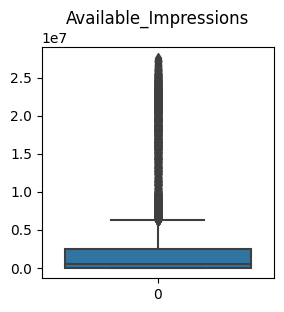

outliers in Available_Impressions are
[4414315, 4610097, 4409736, 4437187, 4611062, 4882816, 4575988, 4424774, 4507784, 4670062, 4822729, 4457853, 4798686, 5167663, 4447657, 4410415, 4478074, 4810546, 4408459, 4506690, 4538110, 4732462, 4601871, 4693718, 5111490, 4642985, 4458676, 4524450, 5167551, 4592516, 4574618, 4533981, 4781991, 4483692, 4883404, 4566188, 4679335, 4498685, 4406876, 5387001, 4542070, 5522510, 4451171, 4780242, 4534242, 5107529, 5250461, 4576984, 4494783, 4674830, 5115908, 4934149, 4916863, 4642037, 4714256, 5232214, 4954912, 5576741, 4779189, 4874093, 4889693, 4643625, 5277960, 4791031, 5614583, 4877754, 4808723, 5118370, 4953198, 4499097, 4989880, 4943024, 5494345, 4502727, 5656777, 5667246, 4589822, 4607200, 5186341, 5044152, 4625644, 5288397, 5750219, 5439701, 5397741, 5676429, 5350424, 5649728, 6228204, 5824294, 4567857, 5664921, 4645042, 6768169, 5338495, 4891393, 4778868, 5542102, 6331473, 5432462, 5424636, 5013690, 5290581, 5318722, 5674391, 9088809, 4844653

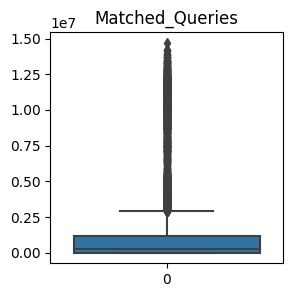

outliers in Matched_Queries are
[2094560, 2081440, 2124060, 2105495, 2255771, 2167605, 2283827, 2192041, 2210719, 2199778, 2260649, 2223888, 2401680, 2196130, 2220001, 2250173, 2254204, 2219893, 2227914, 2223481, 2171704, 2294663, 2181156, 2297425, 2128258, 2189564, 2197627, 2226153, 2319243, 2310438, 2611286, 2258955, 2189753, 2247620, 2320206, 2205410, 2245493, 2122111, 2103100, 2267580, 2277832, 2161132, 2280559, 2413974, 2285521, 2444030, 2337076, 2390194, 2487688, 2068218, 2325055, 2130881, 2316923, 2304627, 2419482, 2458584, 2474062, 2108278, 2405475, 2491531, 2092939, 2220209, 2222268, 2083276, 2466770, 2648126, 2511531, 2480711, 2072512, 2306189, 2317795, 2103205, 2128315, 2433487, 2272244, 2095043, 2444387, 2175759, 2149348, 2602974, 2302836, 2170691, 3383839, 2086460, 2053760, 2279471, 2085215, 2152080, 2150823, 2351995, 2145152, 3440698, 3468018, 2177722, 2146470, 2406717, 2125784, 2065382, 3360556, 2544773, 2414961, 2483761, 2126086, 3383437, 2134761, 2737595, 2082694, 3375

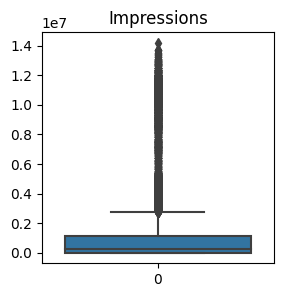

outliers in Impressions are
[2064401, 2046121, 2094215, 2078979, 2226152, 2136521, 2251660, 2158382, 2177863, 2168990, 2232263, 2190420, 2370560, 2161948, 2196228, 2218929, 2220679, 2190419, 2192372, 2188374, 2138436, 2262055, 2148389, 2268861, 2096563, 2155405, 2164752, 2197613, 2291634, 2272204, 2578945, 2229769, 2162153, 2216194, 2284595, 2180442, 2209784, 2074731, 2007468, 2232506, 2246546, 2120195, 2246368, 1944645, 2376451, 2255898, 2410283, 2307381, 2350165, 2455500, 1971548, 2293347, 2068114, 2288882, 2274678, 2386565, 2427090, 2440041, 2058811, 2373121, 2458446, 2065487, 2109593, 2192170, 1988439, 2439722, 2613602, 2479296, 2447006, 2031675, 2274095, 1992593, 2211595, 2073916, 2009093, 2100573, 2397548, 2240666, 1991870, 2411441, 2129863, 2098415, 2566028, 2203340, 2115427, 3298503, 1991886, 1974881, 2024468, 1998016, 2222978, 1984605, 1971225, 2108917, 1947397, 2121608, 2322732, 2109761, 3380940, 3381589, 2120783, 2116416, 2371389, 2037888, 2027517, 1965777, 2002977, 3265816,

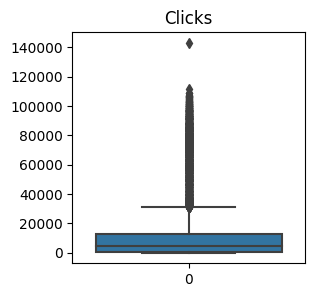

outliers in Clicks are
[23684, 26092, 23929, 22778, 25433, 25529, 22442, 25349, 22486, 22294, 26079, 22567, 23288, 22139, 24708, 23536, 25391, 21897, 23810, 25857, 26733, 22949, 23246, 23109, 22989, 26911, 24408, 22289, 22177, 24631, 22305, 21864, 23389, 22166, 24099, 22054, 26822, 23630, 24230, 22810, 26736, 22716, 22962, 24169, 22053, 24622, 24708, 25436, 24195, 26145, 23677, 22102, 22307, 24458, 30224, 23321, 27775, 23281, 23404, 22846, 24370, 26254, 23183, 22088, 26319, 24756, 24379, 24838, 26558, 24059, 28824, 21967, 22477, 24121, 26670, 22257, 22216, 24983, 24571, 22003, 22701, 23928, 22383, 24598, 25330, 27180, 30863, 27561, 23519, 23578, 22504, 22742, 22908, 23500, 22175, 24085, 24225, 24079, 22750, 22488, 24712, 22034, 28398, 31940, 22346, 23677, 26480, 22565, 25919, 22342, 23919, 21896, 22051, 22713, 23341, 25107, 26177, 23315, 22135, 22844, 24569, 29352, 23150, 25614, 23212, 27954, 24267, 27280, 24957, 21892, 23294, 22150, 22434, 24051, 27204, 26232, 22254, 23346, 25398, 300

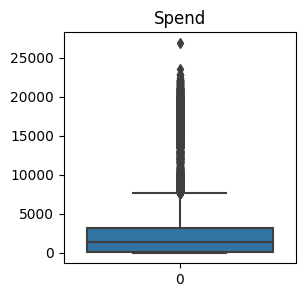

outliers in Spend are
[5398.97, 5399.69, 5402.69, 5404.35, 5405.13, 5405.83, 5406.36, 5407.16, 5407.16, 5411.07, 5411.16, 5411.25, 5411.44, 5413.82, 5414.12, 5420.75, 5420.89, 5421.88, 5424.97, 5425.86, 5425.87, 5426.65, 5428.86, 5429.09, 5431.83, 5436.46, 5436.84, 5439.11, 5440.02, 5440.85, 5441.0, 5442.0, 5443.22, 5443.33, 5444.03, 5445.35, 5446.01, 5446.94, 5450.42, 5452.03, 5454.32, 5456.14, 5457.32, 5458.91, 5460.19, 5460.34, 5460.35, 5470.31, 5472.81, 5474.68, 5475.96, 5476.45, 5477.3, 5479.44, 5479.74, 5480.23, 5483.14, 5483.14, 5483.73, 5485.64, 5486.85, 5487.69, 5488.19, 5491.55, 5492.66, 5493.8, 5494.74, 5496.28, 5496.29, 5496.85, 5497.53, 5499.51, 5500.34, 5500.64, 5501.82, 5502.42, 5503.05, 5504.28, 5507.06, 5507.41, 5507.41, 5508.36, 5510.72, 5511.29, 5511.37, 5511.49, 5512.32, 5514.42, 5517.95, 5518.13, 5518.31, 5519.0, 5521.12, 5522.57, 5527.68, 5529.76, 5534.6, 5535.64, 5536.85, 5537.87, 5538.03, 5545.42, 5545.63, 5546.78, 5549.26, 5550.02, 5551.78, 5554.51, 5564.0, 556

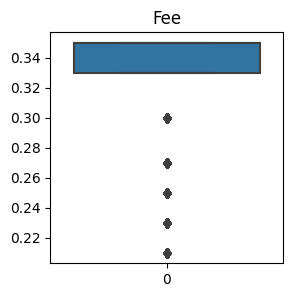

outliers in Fee are
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,

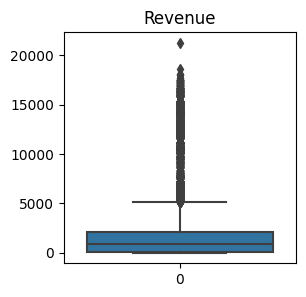

outliers in Revenue are
[3618.7, 3618.89, 3619.29, 3619.51, 3619.63, 3619.75, 3619.95, 3621.36, 3622.34, 3622.59, 3623.39, 3623.4, 3625.28, 3626.25, 3627.36, 3627.45, 3627.52, 3627.7, 3628.32, 3629.54, 3629.6, 3630.29, 3630.31, 3630.35, 3634.72, 3634.77, 3635.06, 3635.93, 3636.44, 3636.6, 3638.16, 3638.2, 3639.12, 3640.12, 3642.52, 3643.11, 3643.76, 3644.08, 3644.44, 3644.93, 3645.45, 3645.78, 3646.72, 3647.09, 3647.66, 3648.32, 3648.54, 3649.78, 3650.01, 3650.37, 3650.81, 3653.22, 3653.86, 3654.09, 3655.14, 3655.87, 3656.77, 3657.05, 3657.32, 3657.7, 3658.0, 3658.38, 3660.11, 3660.81, 3660.86, 3661.92, 3662.26, 3662.36, 3662.36, 3663.67, 3664.23, 3664.28, 3664.81, 3665.38, 3665.99, 3667.83, 3668.52, 3671.65, 3671.88, 3672.03, 3673.2, 3673.37, 3676.14, 3676.15, 3677.74, 3680.6, 3681.47, 3682.05, 3682.32, 3682.96, 3683.08, 3684.93, 3685.12, 3685.16, 3685.46, 3685.96, 3688.21, 3691.09, 3691.83, 3693.0, 3694.24, 3695.33, 3696.21, 3697.06, 3698.25, 3698.85, 3700.82, 3701.28, 3701.62, 3704.

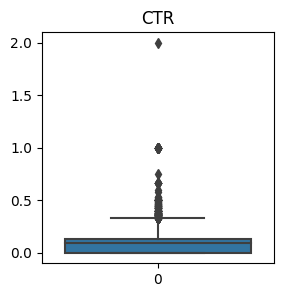

outliers in CTR are
[0.5, 0.2857, 0.3333, 0.4, 0.3, 0.6667, 0.3077, 0.25, 0.3684, 0.3077, 0.2727, 1.0, 0.2941, 0.3636, 0.2821, 0.2381, 0.3182, 0.24, 0.4, 0.2381, 0.3148, 0.3333, 0.3824, 0.3, 0.3333, 0.45, 0.2791, 0.2667, 0.2667, 0.28, 0.3125, 0.4, 0.2941, 0.2979, 0.2698, 0.2778, 0.3684, 0.25, 0.3056, 0.2927, 0.2821, 0.3243, 0.4063, 0.2955, 0.2558, 0.2407, 0.254, 0.2987, 0.2843, 0.2414, 0.2647, 0.3243, 0.2628, 0.34, 0.2948, 0.3143, 0.2393, 0.2778, 0.3, 0.2716, 0.3636, 0.2571, 0.3362, 0.2571, 0.2377, 0.2774, 0.2625, 0.2816, 0.2864, 0.2763, 0.2632, 0.2511, 0.2969, 0.2437, 0.2368, 0.262, 0.2514, 0.272, 0.3094, 0.2712, 0.2836, 0.2763, 0.2958, 0.3111, 0.3459, 0.2365, 0.2519, 0.2437, 0.269, 0.2606, 0.2422, 0.2424, 0.2795, 0.3621, 0.2797, 0.2693, 0.2573, 0.2481, 0.262, 0.3688, 0.2789, 0.2449, 0.3296, 0.3476, 0.2786, 0.2729, 0.2893, 0.2763, 0.2444, 0.2431, 0.2512, 0.2831, 0.2811, 0.3024, 0.2638, 0.3342, 0.3429, 0.2572, 0.273, 0.2954, 0.3357, 0.2613, 0.2732, 0.264, 0.2682, 0.262, 0.2452, 0.2662,

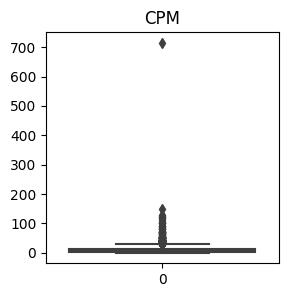

outliers in CPM are
[35.0, 25.18, 27.54, 62.64, 81.56, 23.88, 51.34, 23.59, 25.86, 38.55, 36.56, 40.12, 22.73, 23.47, 24.61, 30.96, 23.59, 24.16, 24.41, 39.13, 29.85, 24.79, 23.05, 31.21, 22.27, 22.21, 40.62, 22.12, 21.6, 22.37, 25.45, 21.72, 22.83, 22.34, 25.13, 24.26, 23.13, 21.54, 21.87, 23.71, 24.73, 24.57, 23.17, 26.06, 27.26, 22.89, 31.07, 22.28, 25.42, 21.81, 28.1, 23.65, 22.51, 42.74, 46.31, 25.46, 22.03, 33.92, 23.97, 27.01, 23.36, 26.57, 29.17, 24.12, 24.76, 29.1, 21.72, 24.22, 21.98, 25.65, 26.76, 24.73, 33.33, 29.6, 25.91, 24.53, 28.29, 23.05, 25.45, 22.97, 23.19, 25.35, 28.33, 29.93, 22.06, 25.81, 27.89, 25.48, 23.76, 22.55, 27.41, 23.29, 22.8, 21.62, 24.15, 27.71, 22.3, 22.21, 24.49, 23.62, 23.68, 22.6, 22.31, 23.35, 23.92, 25.48, 22.73, 24.38, 25.54, 21.71, 26.69, 22.03, 25.81, 27.05, 22.97, 27.03, 24.44, 27.52, 34.25, 23.61, 28.97, 21.54, 27.05, 22.5, 22.16, 28.89, 22.13, 22.26, 23.06, 28.13, 21.98, 21.51, 22.3, 29.79, 25.3, 29.96, 26.11, 22.43, 33.26, 32.59, 23.74, 21.

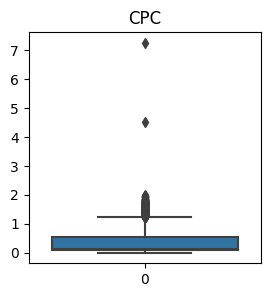

outliers in CPC are
[1.1, 1.11, 1.33, 1.41, 1.57, 1.61, 1.85, 1.94, 4.51, 1.11, 7.26, 1.54, 1.12, 0.91, 0.9, 0.92, 0.93, 1.1, 0.94, 1.07, 0.97, 0.9, 1.2, 0.95, 0.91, 0.96, 1.01, 0.9, 0.95, 0.9, 0.96, 0.93, 0.93, 0.91, 0.98, 0.91, 0.91, 1.07, 0.92, 0.95, 0.97, 1.0, 0.92, 0.92, 0.93, 1.07, 1.11, 0.91, 0.96, 0.95, 0.93, 0.92, 0.99, 1.0, 0.97, 1.06, 0.9, 0.9, 1.01, 0.91, 0.91, 0.94, 0.92, 0.9, 0.9, 0.94, 1.05, 1.09, 0.91, 0.94, 0.92, 0.92, 0.93, 0.98, 0.92, 0.91, 0.94, 0.92, 0.96, 1.01, 0.92, 0.92, 0.92, 0.94, 0.9, 0.92, 0.91, 1.04, 1.11, 0.94, 0.91, 0.98, 0.91, 0.92, 1.46, 0.9, 1.27, 0.96, 1.47, 0.93, 0.91, 1.38, 1.14, 1.36, 1.55, 1.51, 0.9, 1.54, 1.5, 1.57, 1.61, 1.54, 1.5, 1.36, 1.55, 1.52, 1.5, 1.24, 1.46, 1.55, 1.42, 1.54, 1.49, 0.94, 1.47, 1.45, 0.97, 1.63, 1.42, 1.49, 1.7, 1.42, 1.49, 1.43, 1.49, 1.54, 1.41, 1.43, 1.52, 1.43, 1.39, 1.45, 1.47, 1.55, 1.46, 1.57, 1.38, 1.47, 1.51, 1.55, 1.77, 1.65, 1.69, 1.58, 1.46, 0.93, 1.4, 1.46, 1.61, 1.43, 1.46, 1.3, 0.91, 1.54, 1.5, 1.7, 1.47, 1

In [18]:
outliers(df1)

* As we can observe from above visualization there are oulier in every numerical column except 'Ad-width' and 'Ad-lenght'.
* And there are 8448 outliers in 'Ad-size' column.
* We can perform K-Means clustering both with and without outliers, and compare the results. If outliers are causing cluster centroids to be pulled away from the main cluster structure, it might be a good idea to address them and using clustering algorithms that are less sensitive to outliers, such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise) or hierarchical clustering.

In [19]:
## Getting distribution of data

def distribution(data):
  for i in numerical_col:
    plt.figure(figsize=(5,5))
    plt.title(i)
    sns.distplot(df1[i])
    plt.show()
    print("-----------------------------------------------------------------")

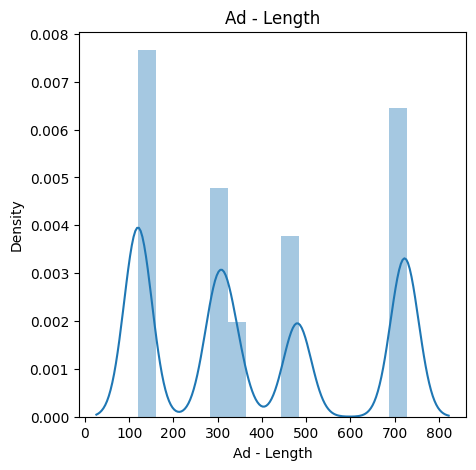

-----------------------------------------------------------------


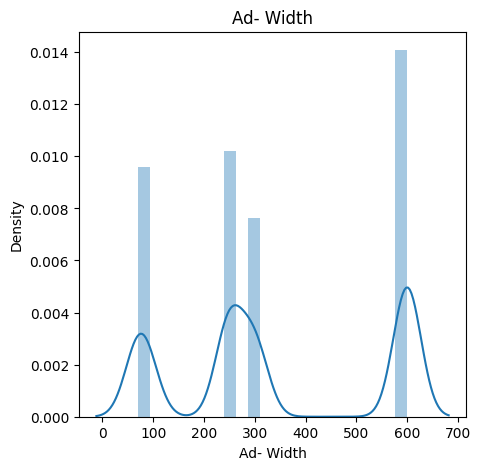

-----------------------------------------------------------------


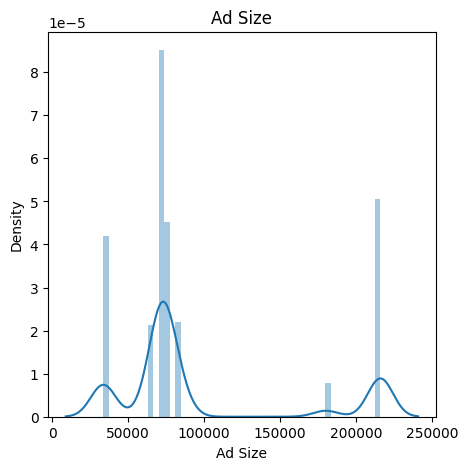

-----------------------------------------------------------------


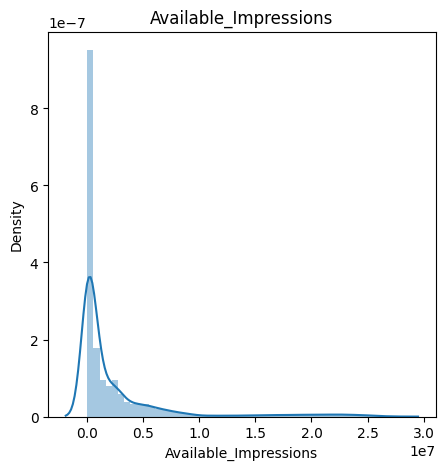

-----------------------------------------------------------------


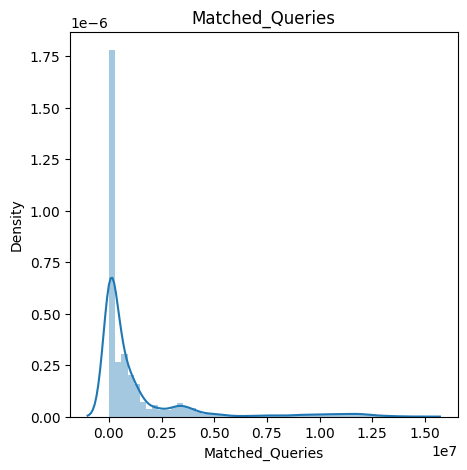

-----------------------------------------------------------------


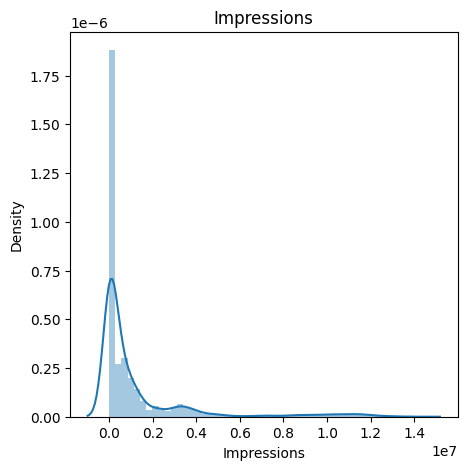

-----------------------------------------------------------------


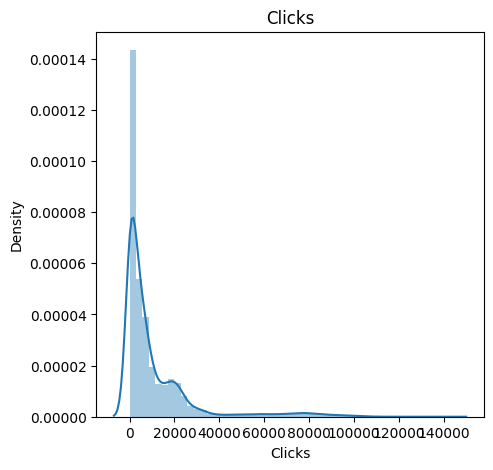

-----------------------------------------------------------------


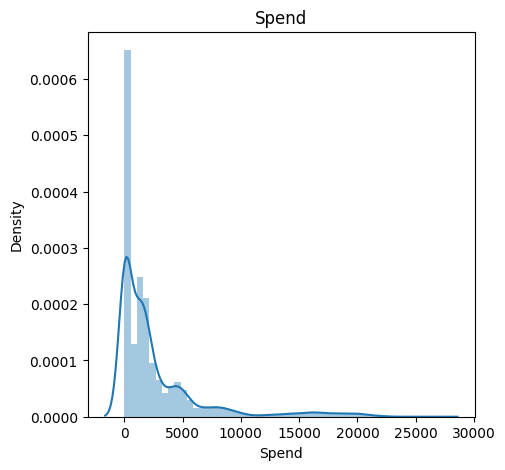

-----------------------------------------------------------------


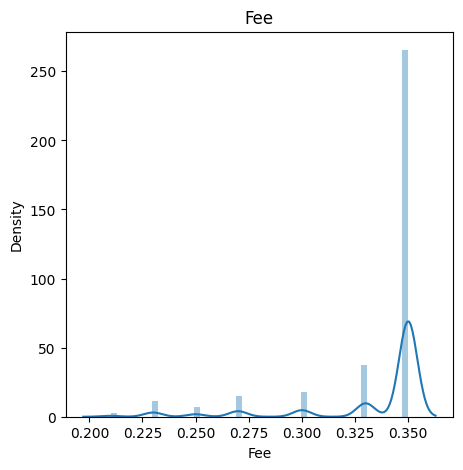

-----------------------------------------------------------------


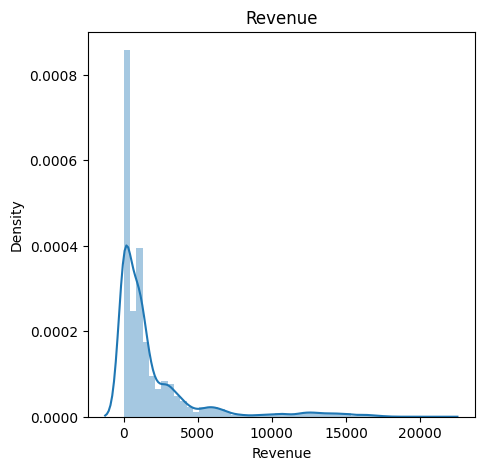

-----------------------------------------------------------------


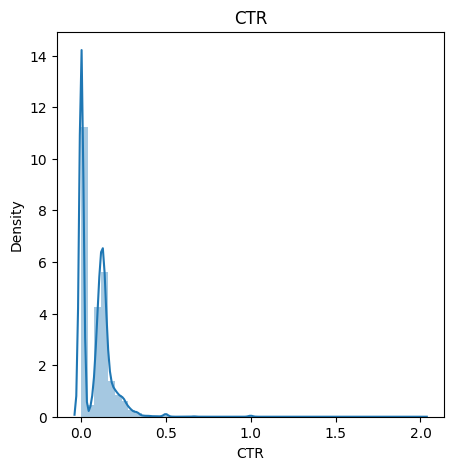

-----------------------------------------------------------------


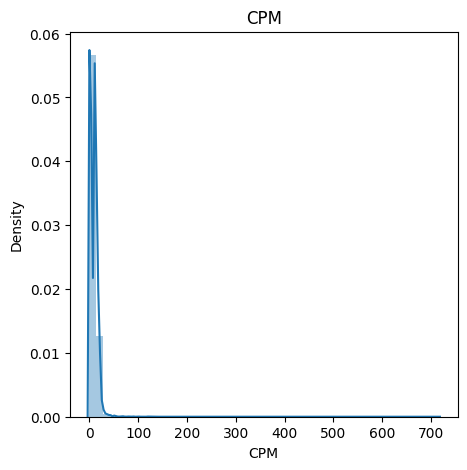

-----------------------------------------------------------------


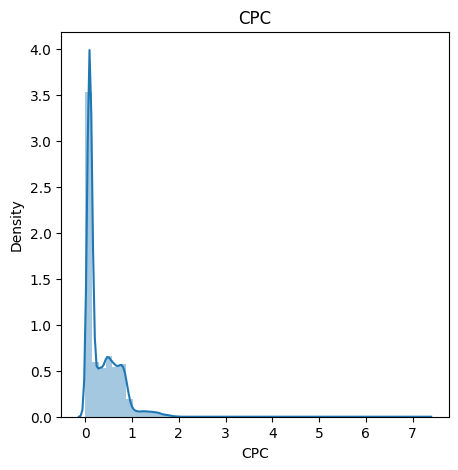

-----------------------------------------------------------------


In [20]:
distribution(df1)

In [21]:
## Scatter plot

def scatter(data):
  for i in numerical_col:
    for j in numerical_col:
      if (i != j):
        plt.figure(figsize=(5,5))
        sns.scatterplot(x = data[i],y=data[j])
        plt.show()
        print("-----------------------------------------------------------------")

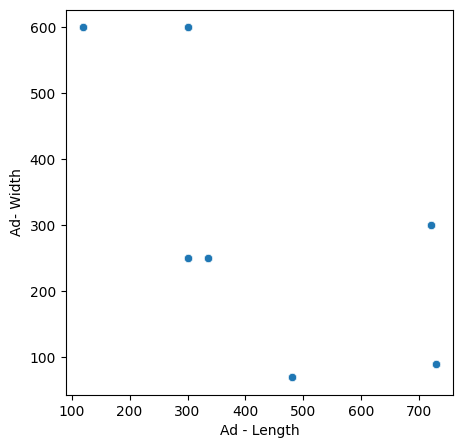

-----------------------------------------------------------------


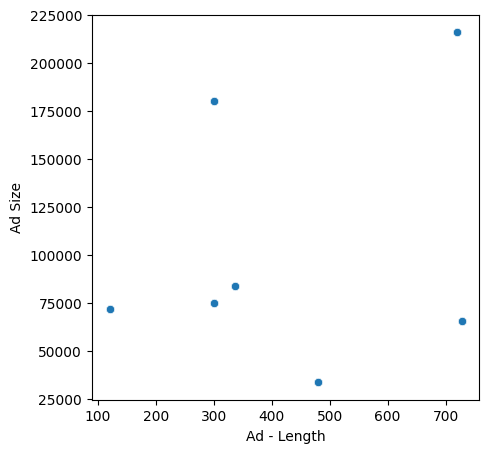

-----------------------------------------------------------------


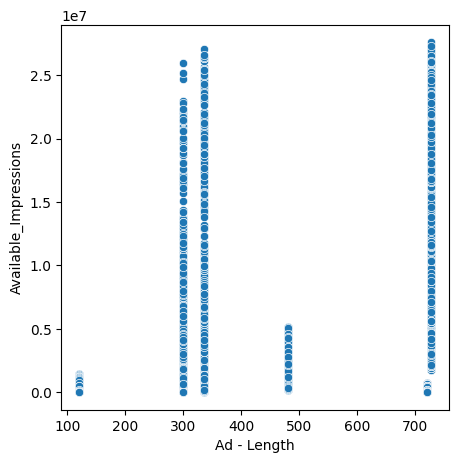

-----------------------------------------------------------------


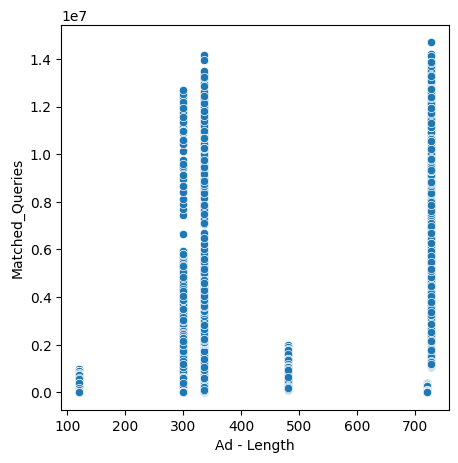

-----------------------------------------------------------------


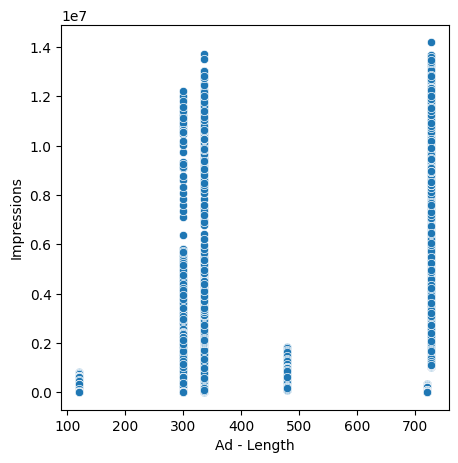

-----------------------------------------------------------------


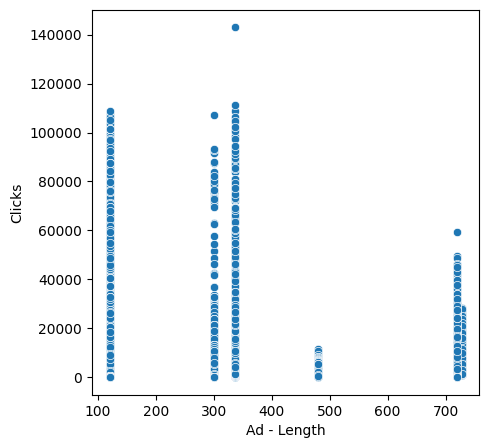

-----------------------------------------------------------------


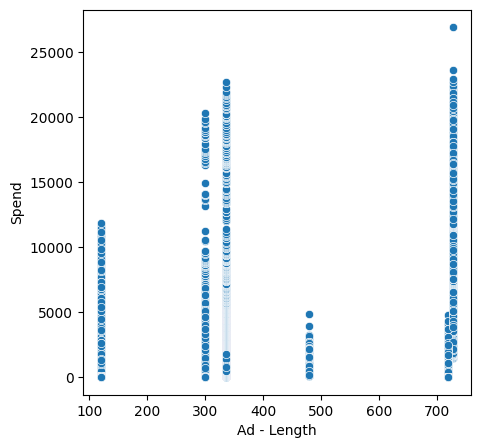

-----------------------------------------------------------------


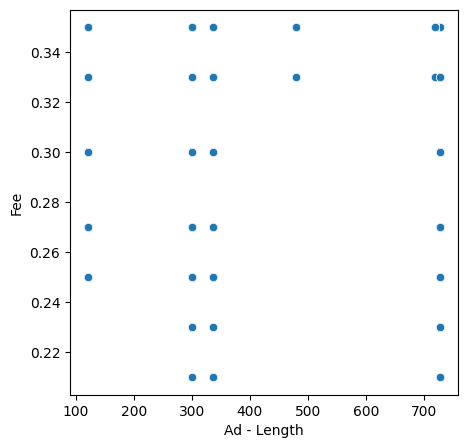

-----------------------------------------------------------------


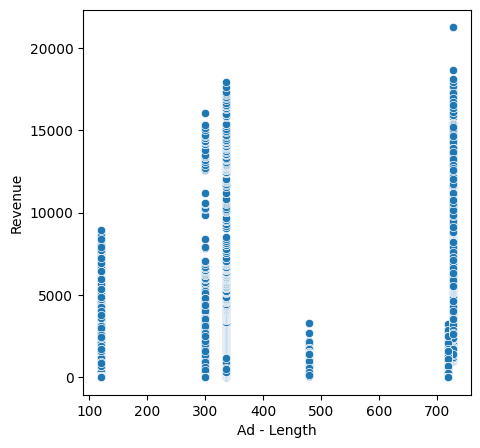

-----------------------------------------------------------------


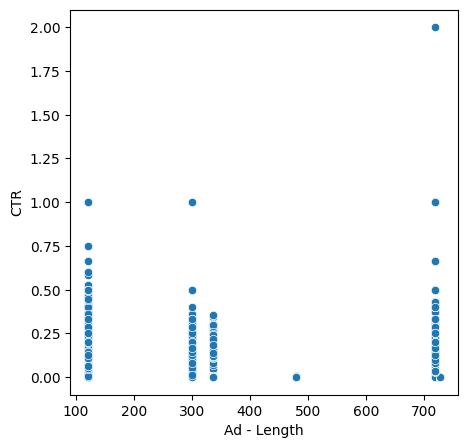

-----------------------------------------------------------------


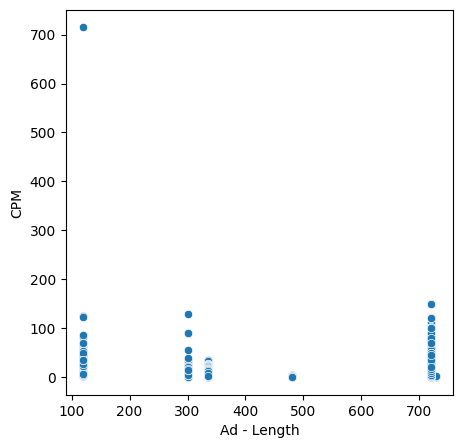

-----------------------------------------------------------------


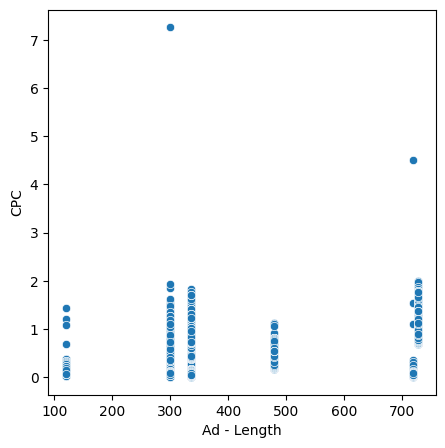

-----------------------------------------------------------------


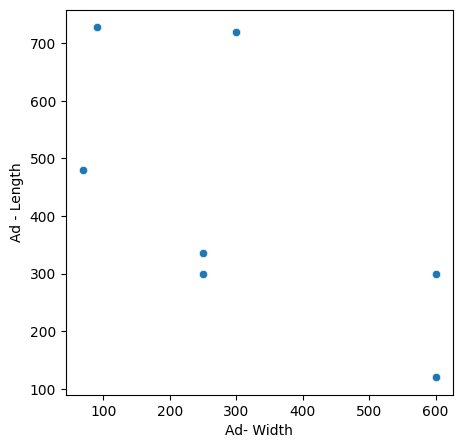

-----------------------------------------------------------------


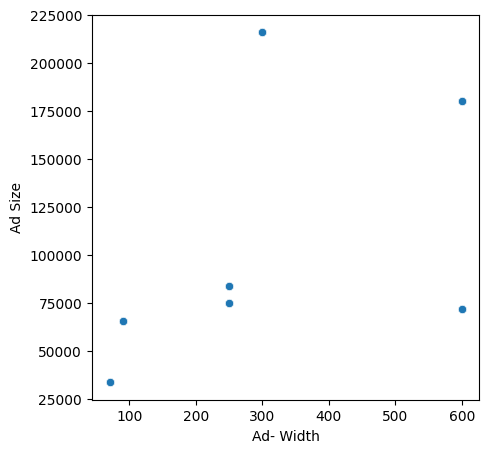

-----------------------------------------------------------------


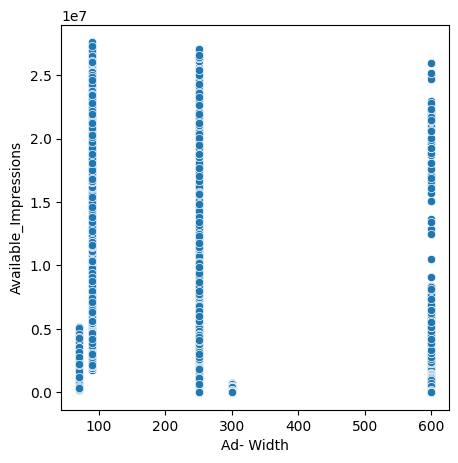

-----------------------------------------------------------------


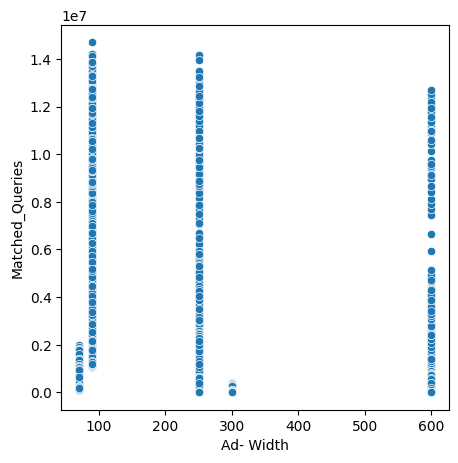

-----------------------------------------------------------------


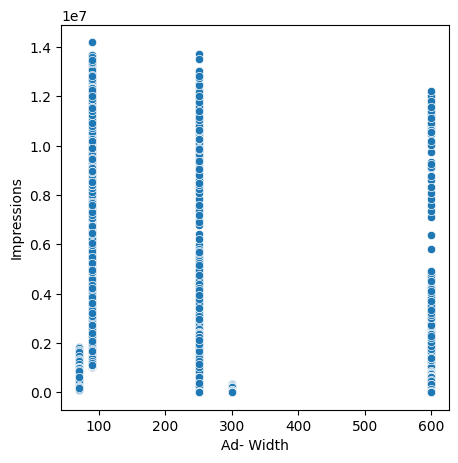

-----------------------------------------------------------------


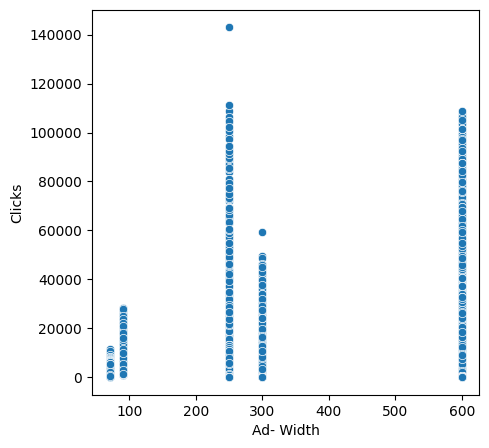

-----------------------------------------------------------------


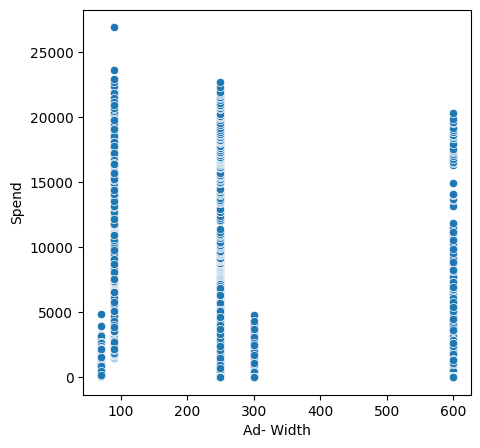

-----------------------------------------------------------------


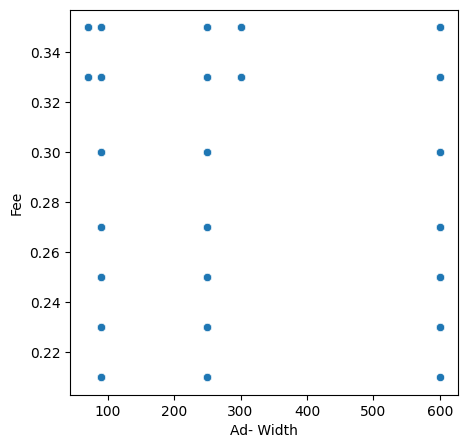

-----------------------------------------------------------------


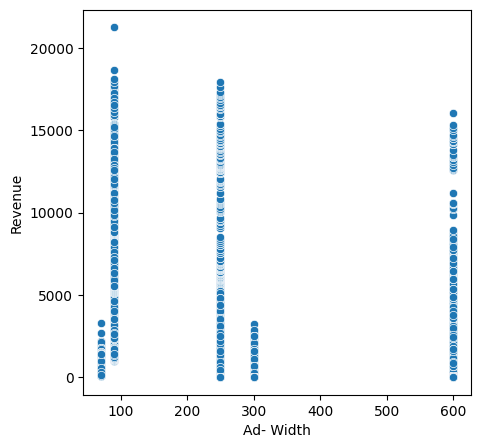

-----------------------------------------------------------------


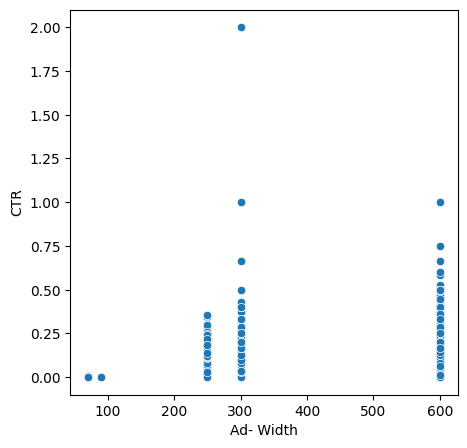

-----------------------------------------------------------------


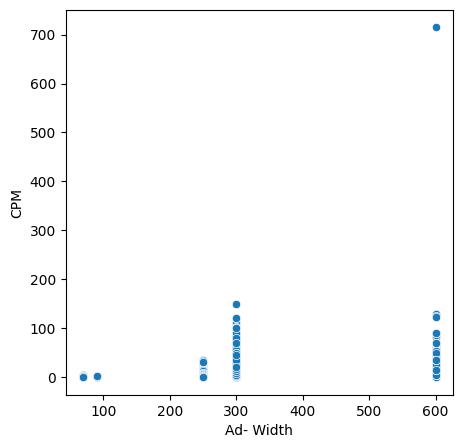

-----------------------------------------------------------------


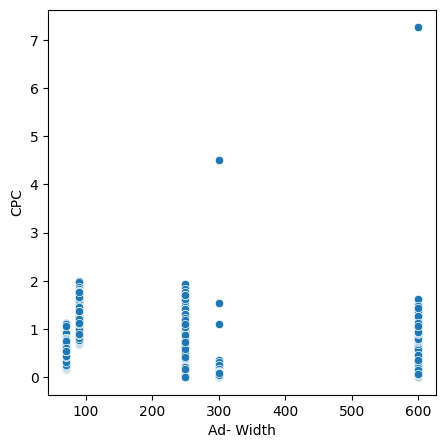

-----------------------------------------------------------------


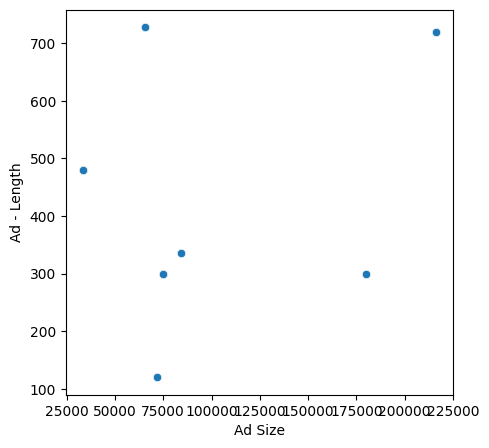

-----------------------------------------------------------------


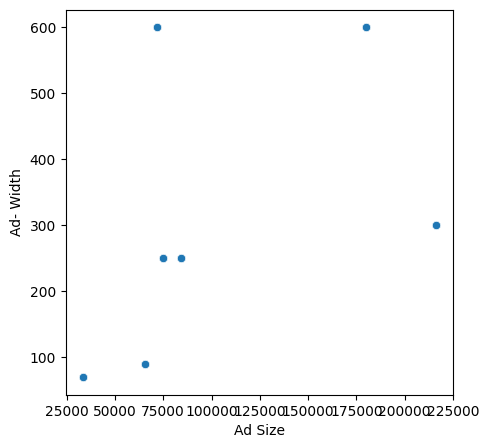

-----------------------------------------------------------------


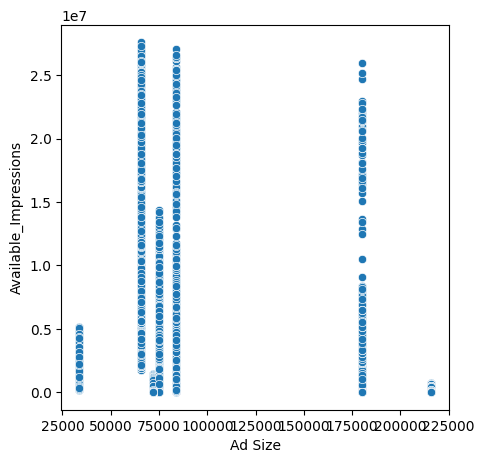

-----------------------------------------------------------------


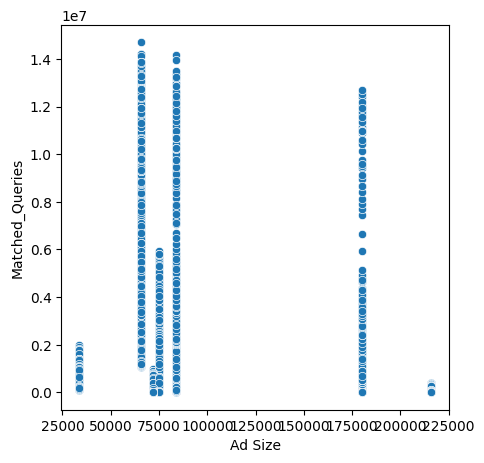

-----------------------------------------------------------------


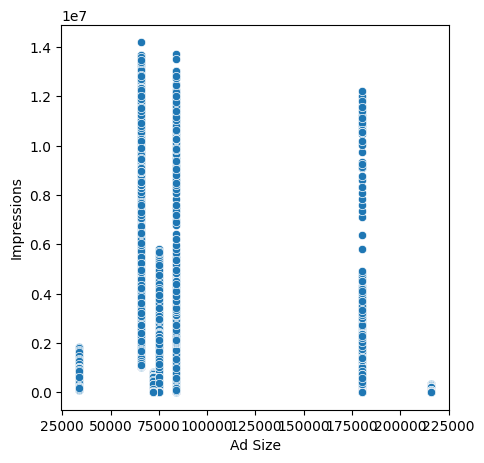

-----------------------------------------------------------------


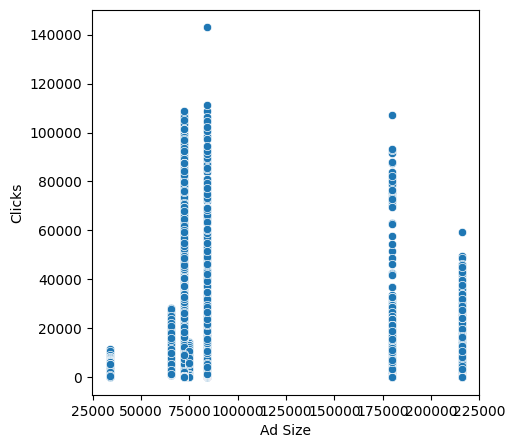

-----------------------------------------------------------------


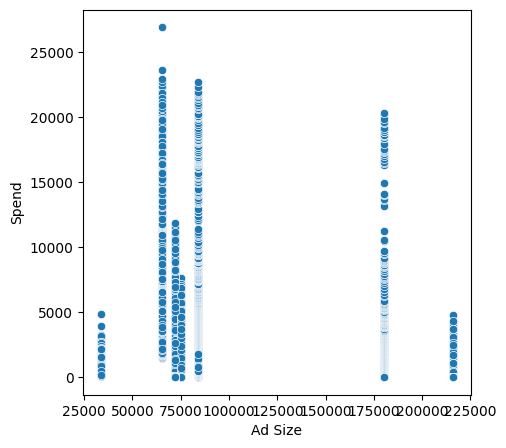

-----------------------------------------------------------------


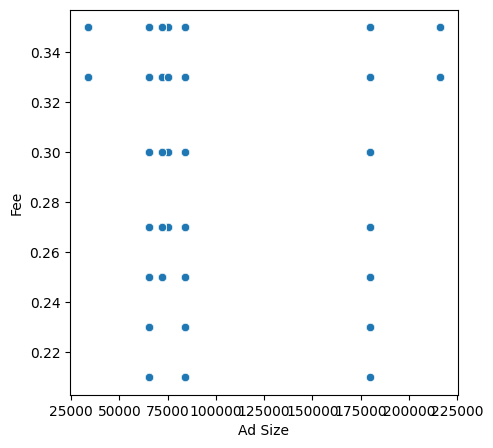

-----------------------------------------------------------------


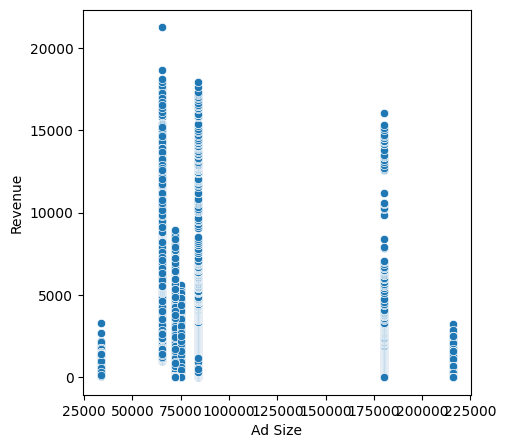

-----------------------------------------------------------------


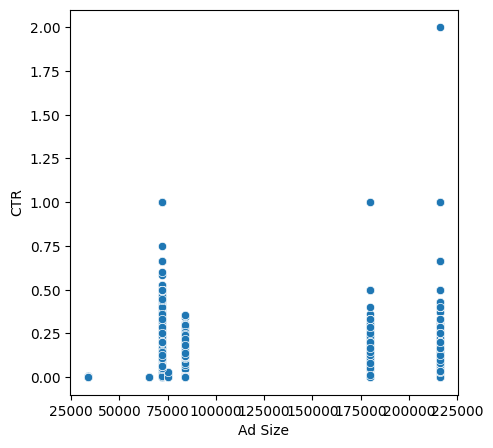

-----------------------------------------------------------------


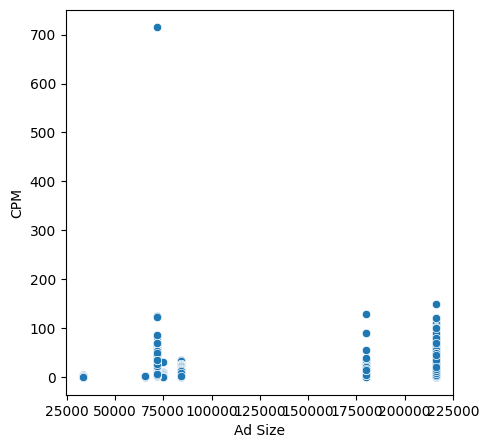

-----------------------------------------------------------------


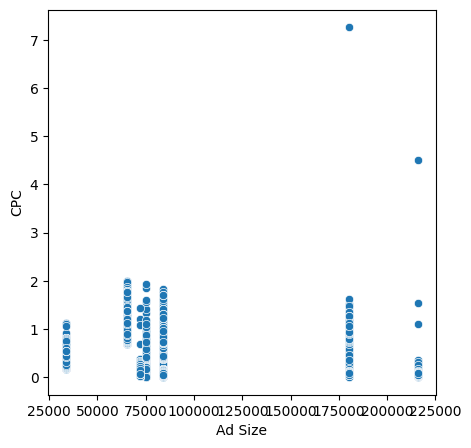

-----------------------------------------------------------------


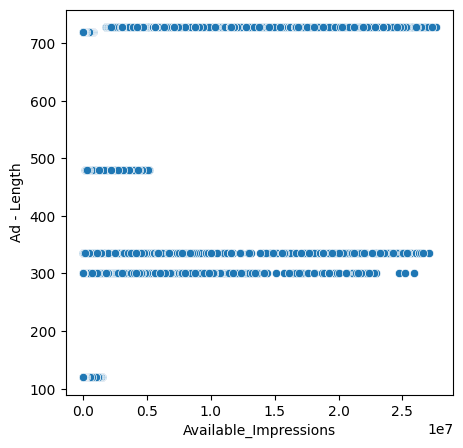

-----------------------------------------------------------------


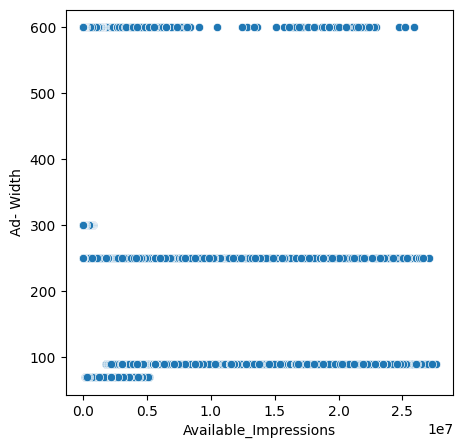

-----------------------------------------------------------------


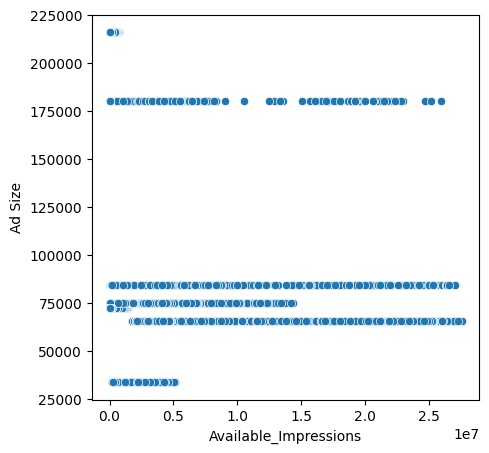

-----------------------------------------------------------------


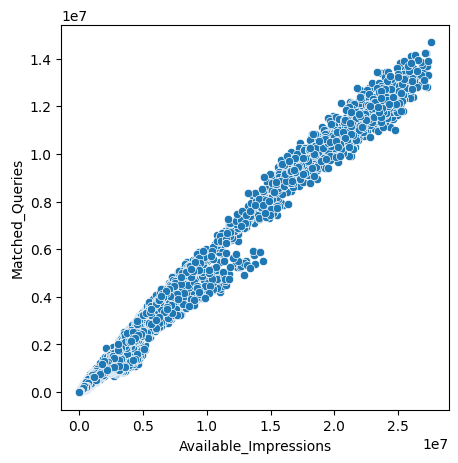

-----------------------------------------------------------------


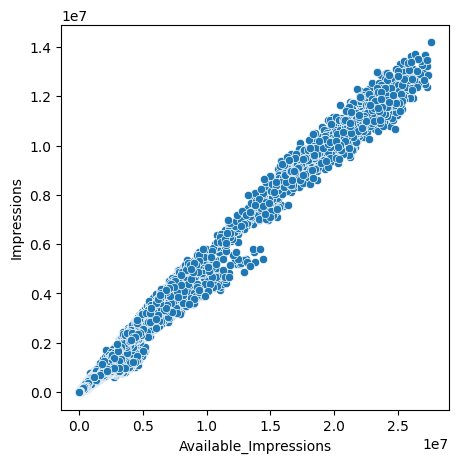

-----------------------------------------------------------------


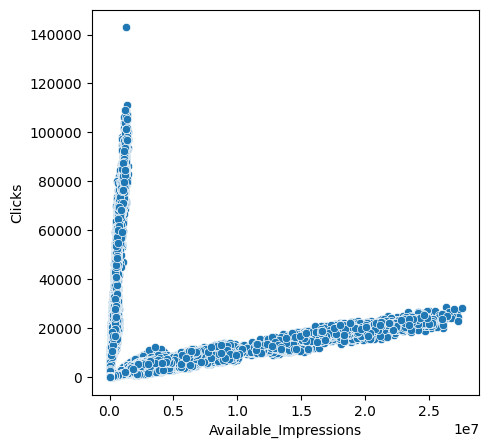

-----------------------------------------------------------------


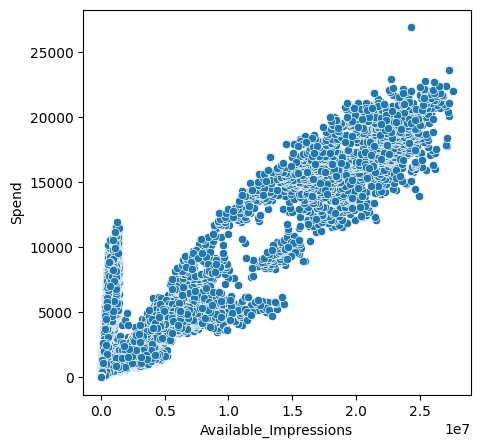

-----------------------------------------------------------------


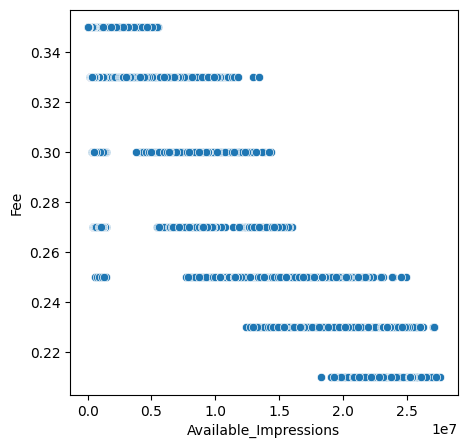

-----------------------------------------------------------------


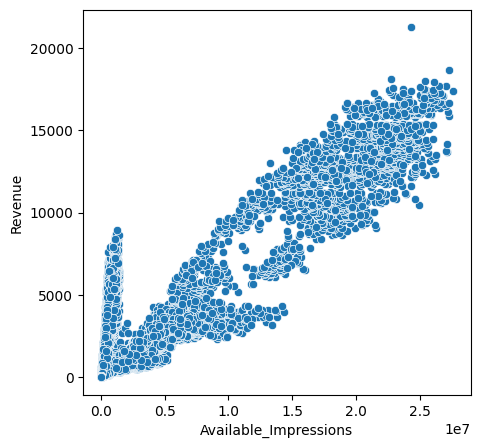

-----------------------------------------------------------------


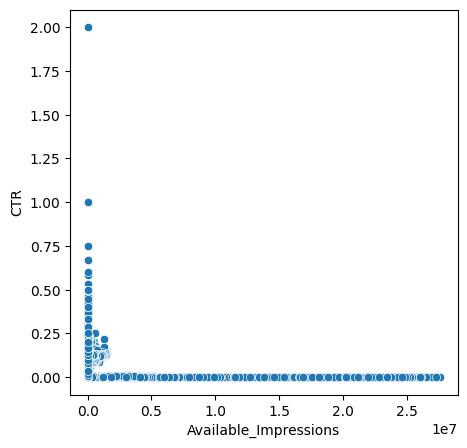

-----------------------------------------------------------------


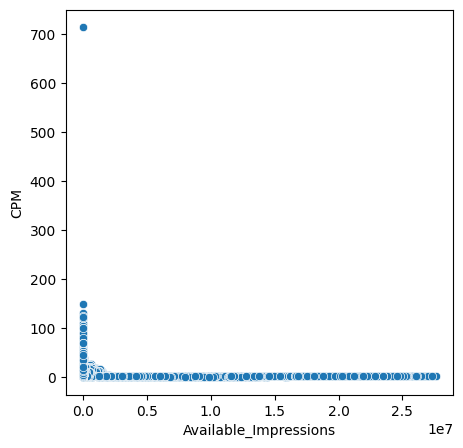

-----------------------------------------------------------------


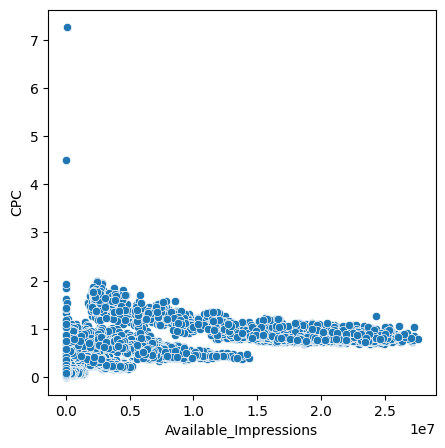

-----------------------------------------------------------------


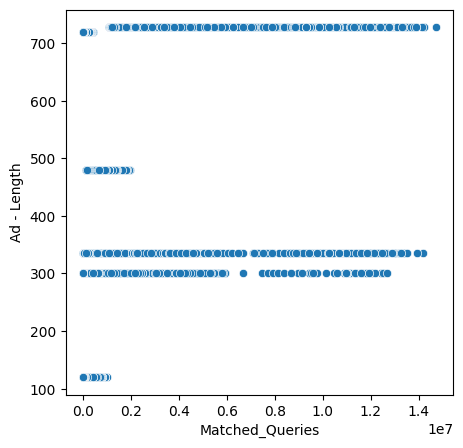

-----------------------------------------------------------------


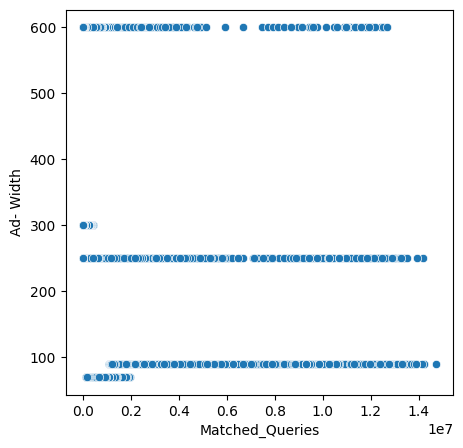

-----------------------------------------------------------------


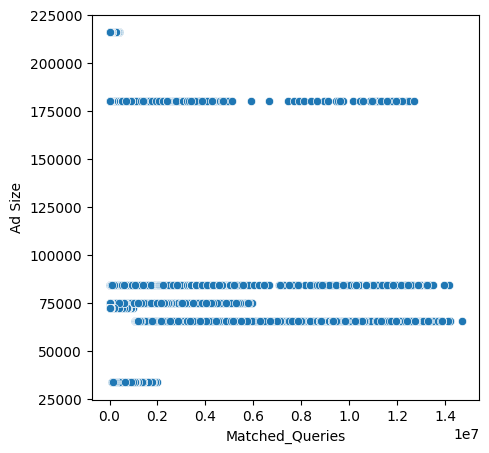

-----------------------------------------------------------------


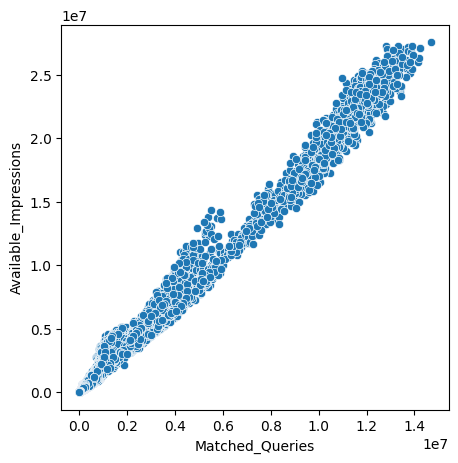

-----------------------------------------------------------------


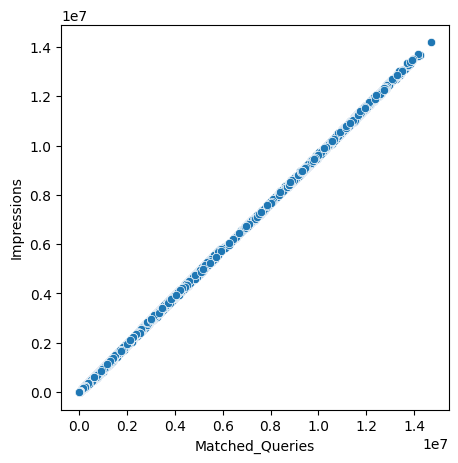

-----------------------------------------------------------------


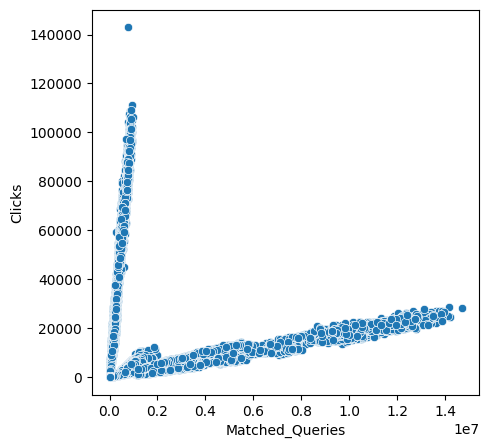

-----------------------------------------------------------------


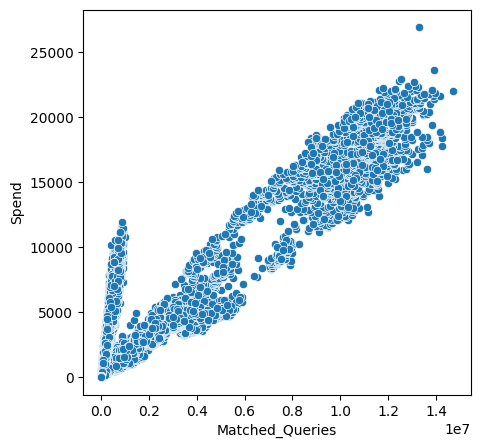

-----------------------------------------------------------------


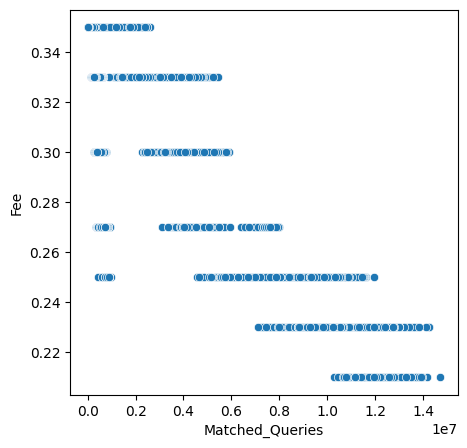

-----------------------------------------------------------------


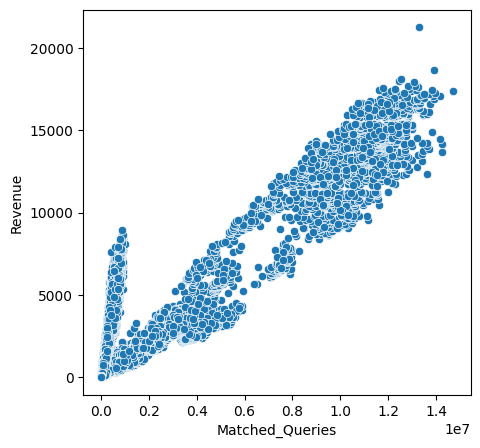

-----------------------------------------------------------------


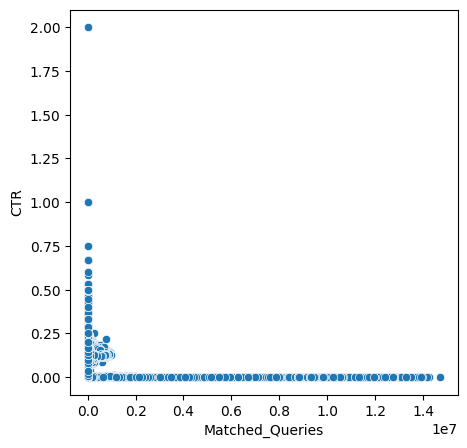

-----------------------------------------------------------------


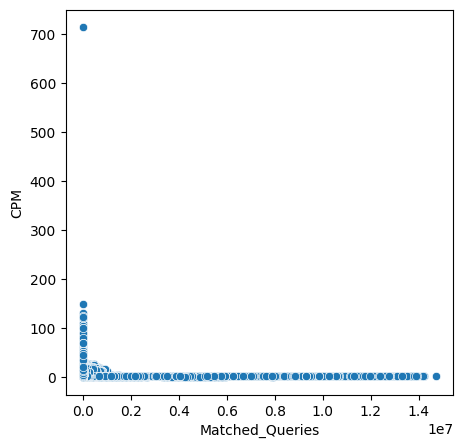

-----------------------------------------------------------------


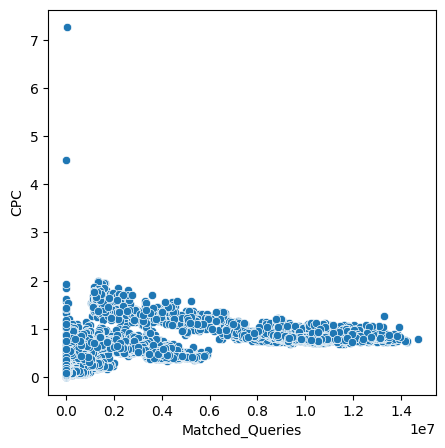

-----------------------------------------------------------------


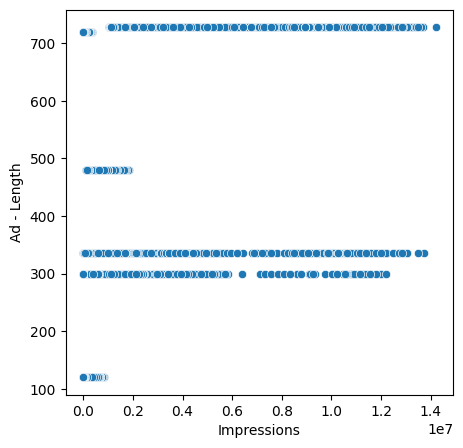

-----------------------------------------------------------------


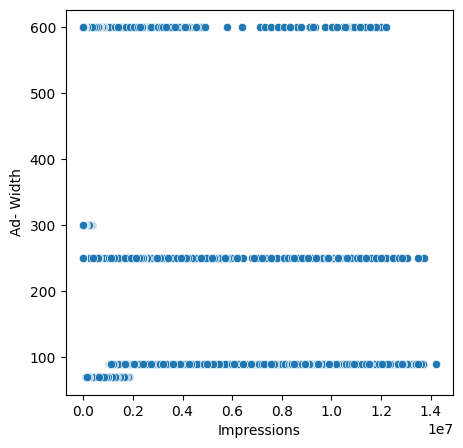

-----------------------------------------------------------------


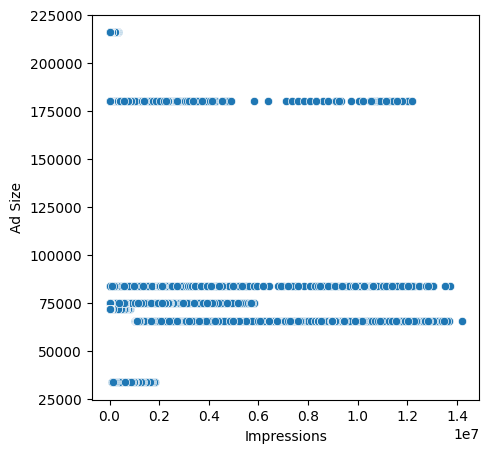

-----------------------------------------------------------------


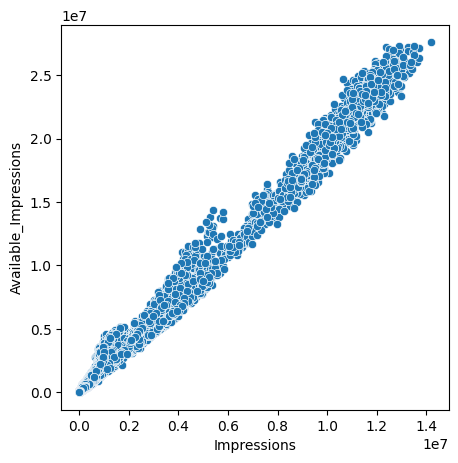

-----------------------------------------------------------------


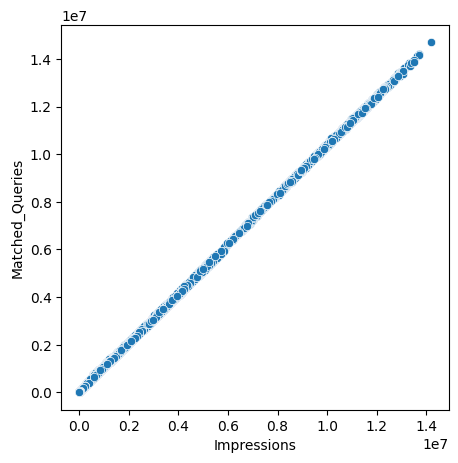

-----------------------------------------------------------------


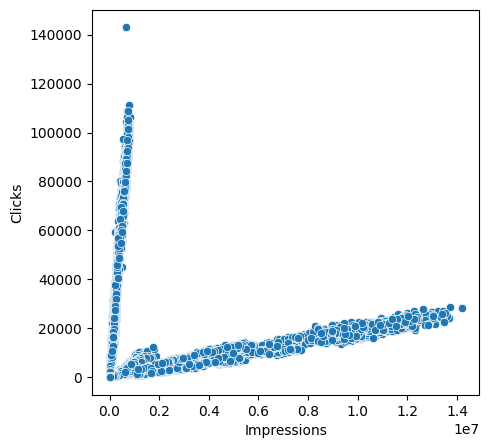

-----------------------------------------------------------------


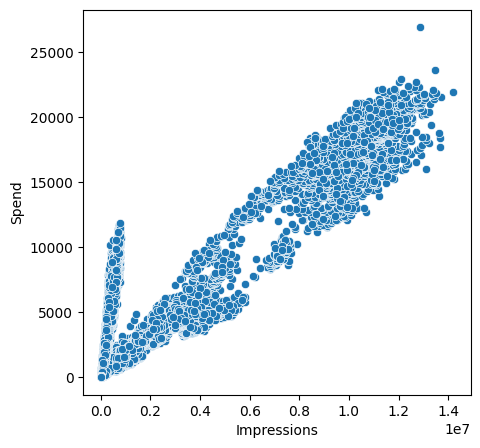

-----------------------------------------------------------------


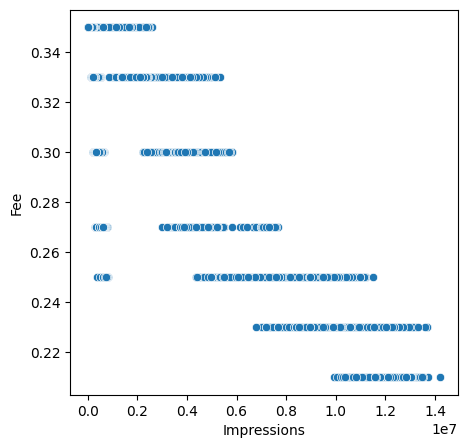

-----------------------------------------------------------------


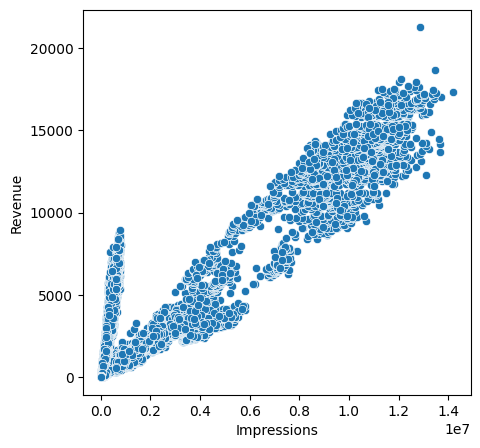

-----------------------------------------------------------------


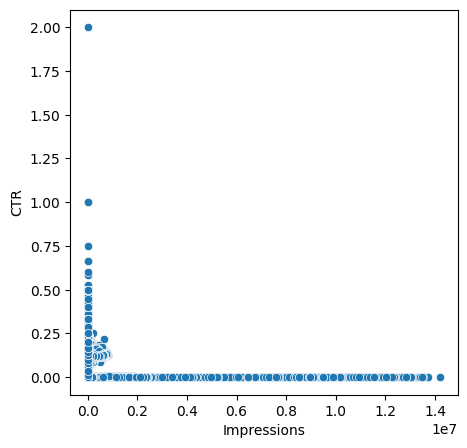

-----------------------------------------------------------------


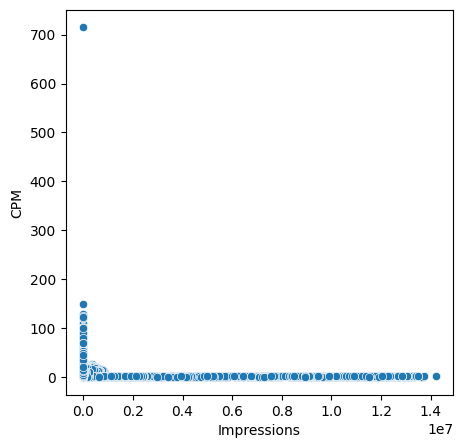

-----------------------------------------------------------------


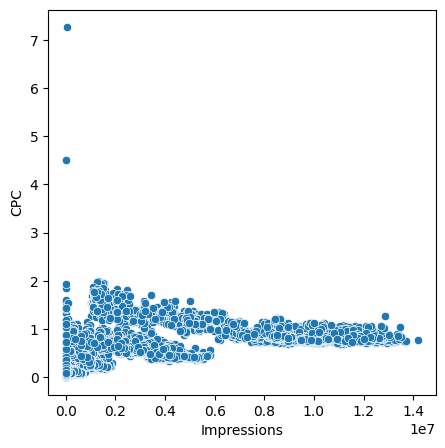

-----------------------------------------------------------------


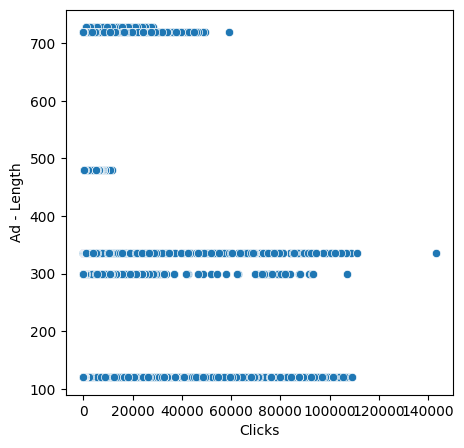

-----------------------------------------------------------------


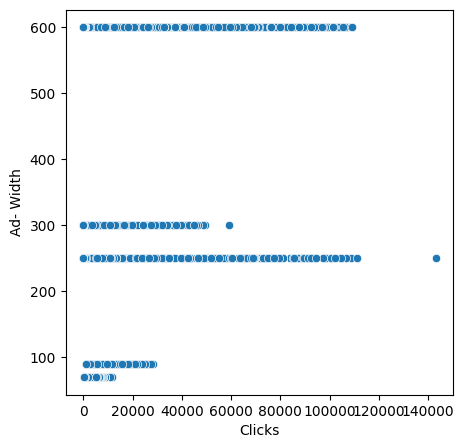

-----------------------------------------------------------------


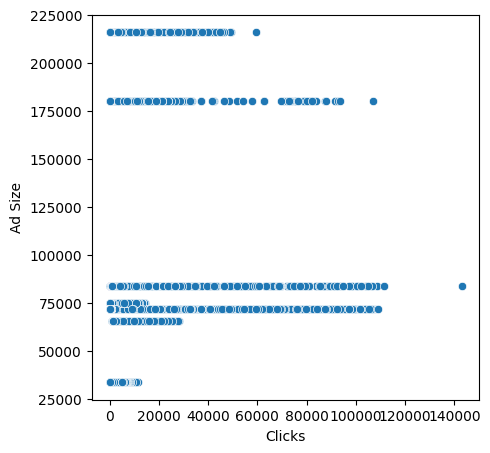

-----------------------------------------------------------------


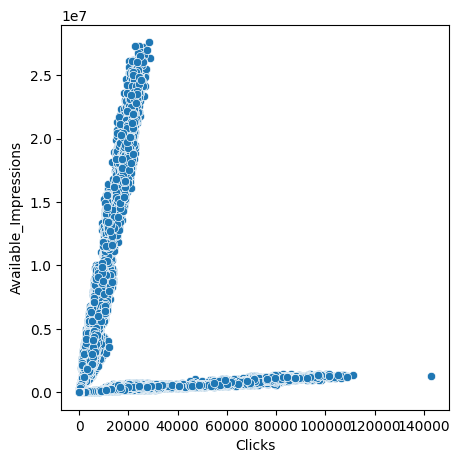

-----------------------------------------------------------------


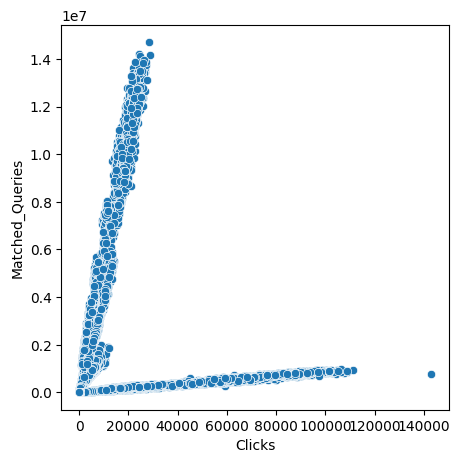

-----------------------------------------------------------------


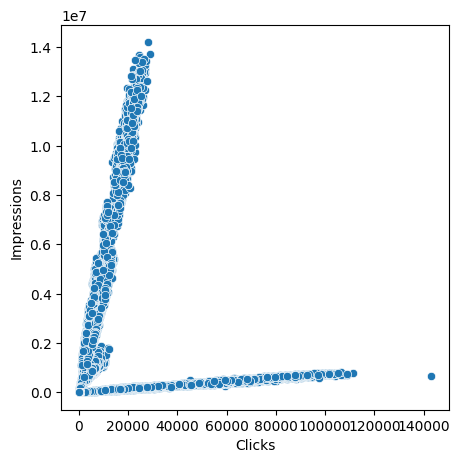

-----------------------------------------------------------------


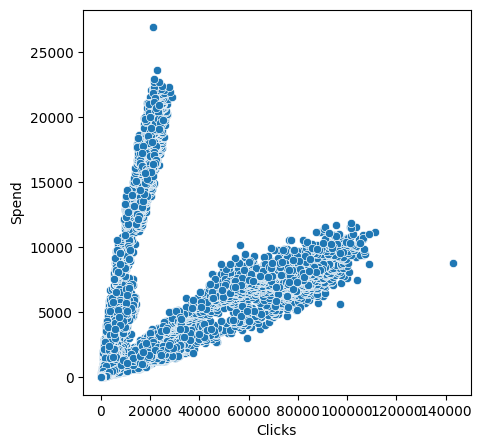

-----------------------------------------------------------------


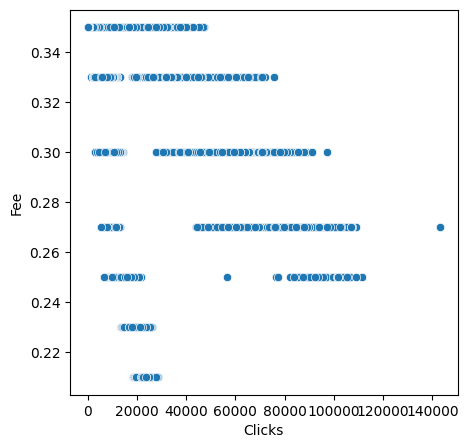

-----------------------------------------------------------------


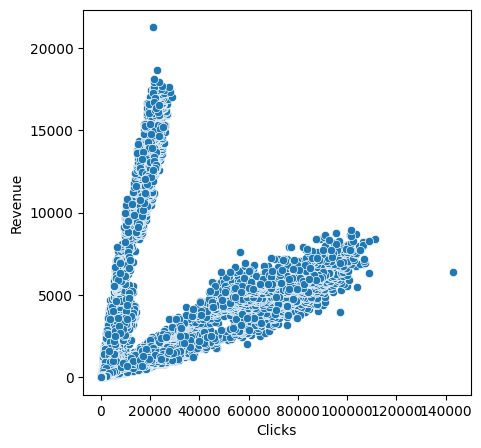

-----------------------------------------------------------------


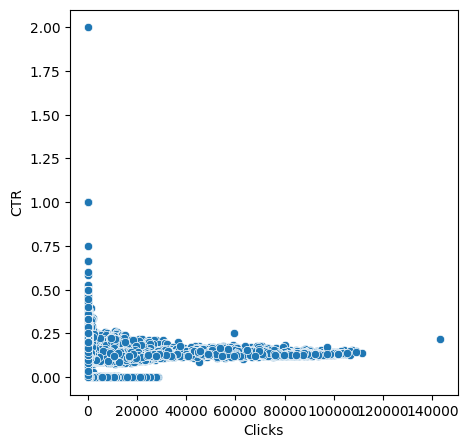

-----------------------------------------------------------------


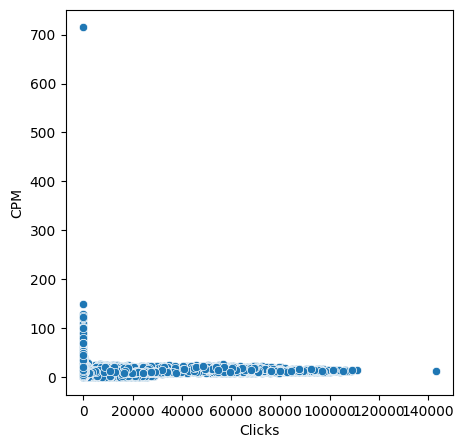

-----------------------------------------------------------------


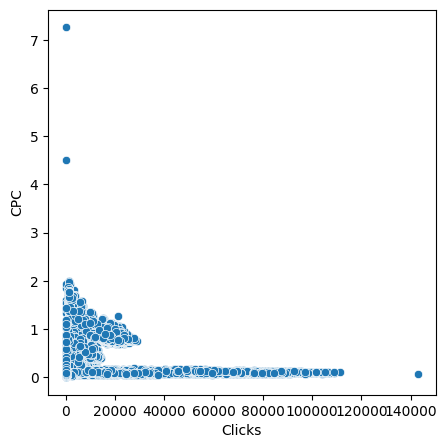

-----------------------------------------------------------------


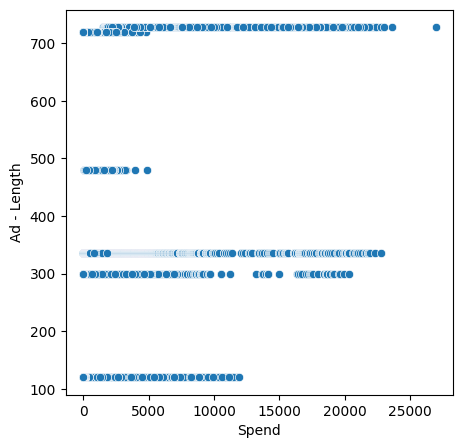

-----------------------------------------------------------------


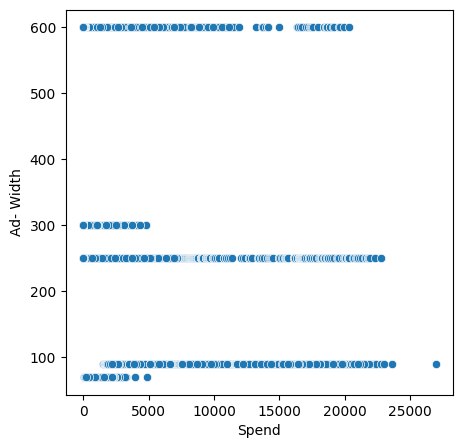

-----------------------------------------------------------------


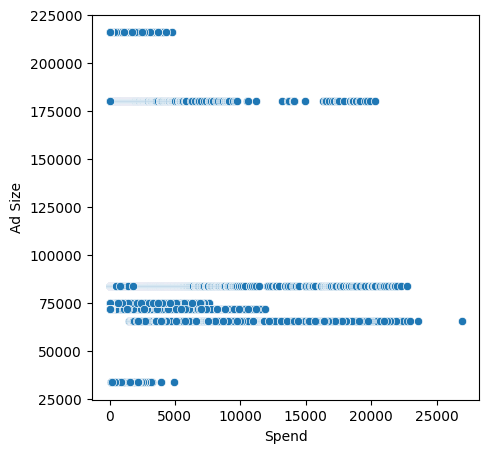

-----------------------------------------------------------------


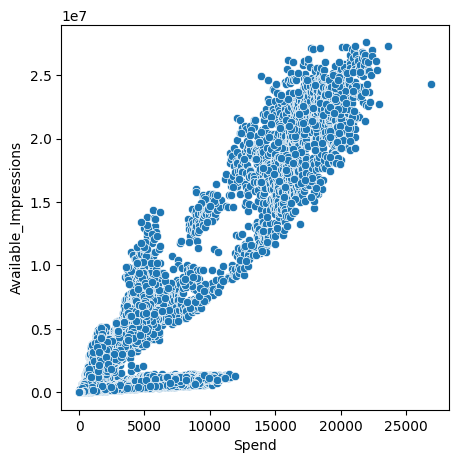

-----------------------------------------------------------------


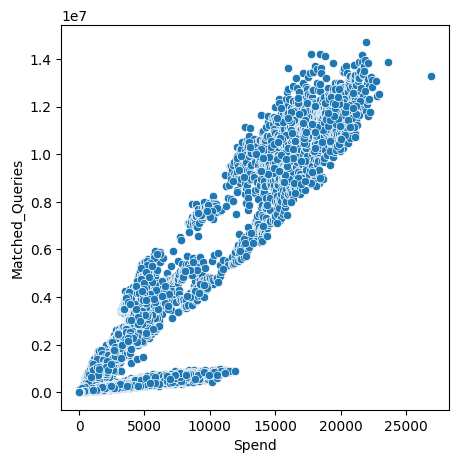

-----------------------------------------------------------------


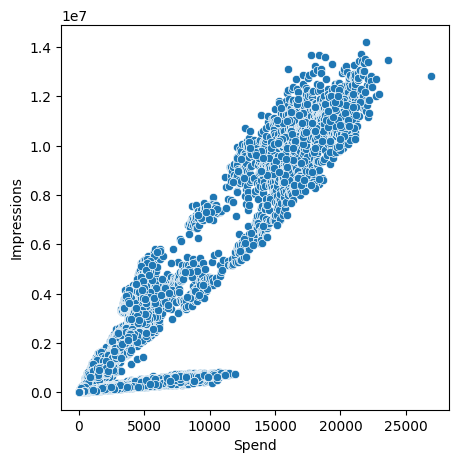

-----------------------------------------------------------------


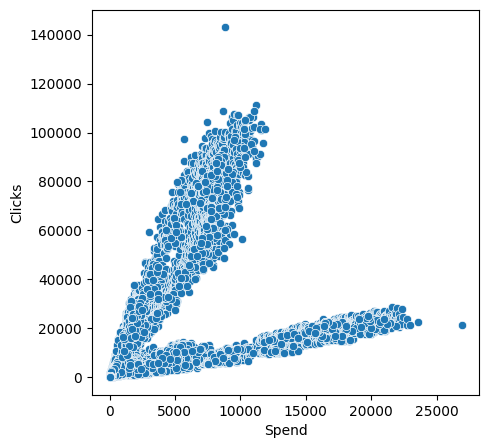

-----------------------------------------------------------------


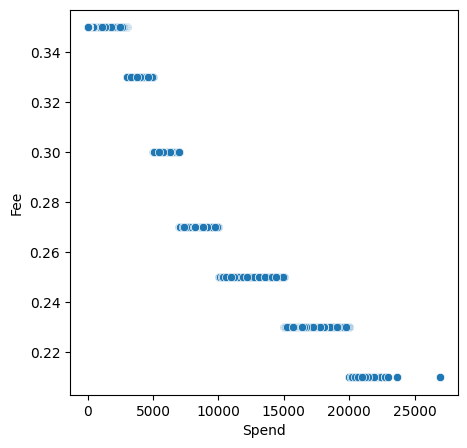

-----------------------------------------------------------------


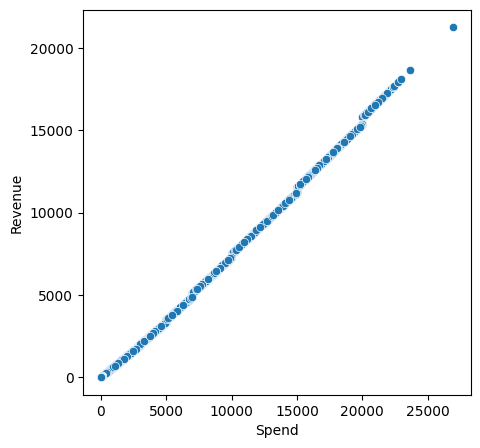

-----------------------------------------------------------------


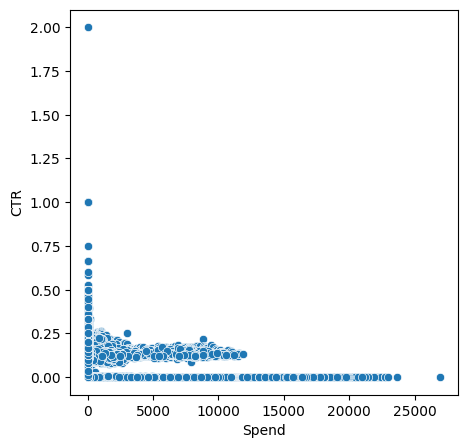

-----------------------------------------------------------------


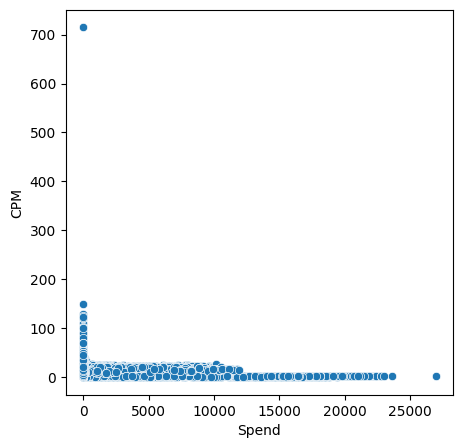

-----------------------------------------------------------------


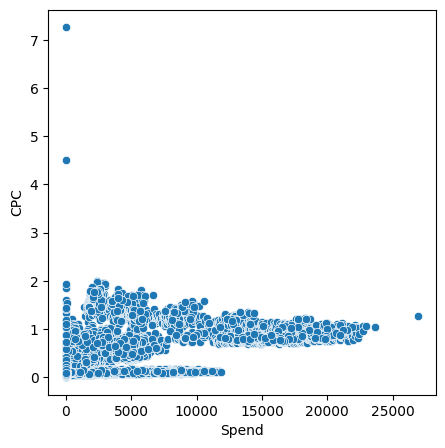

-----------------------------------------------------------------


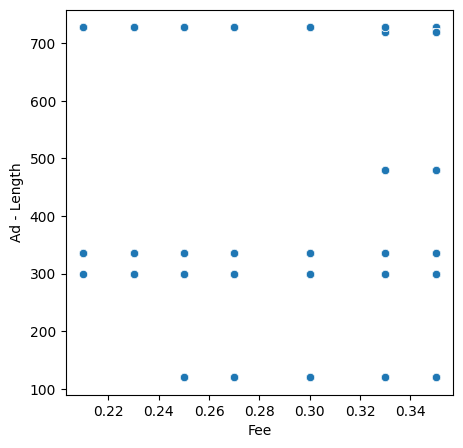

-----------------------------------------------------------------


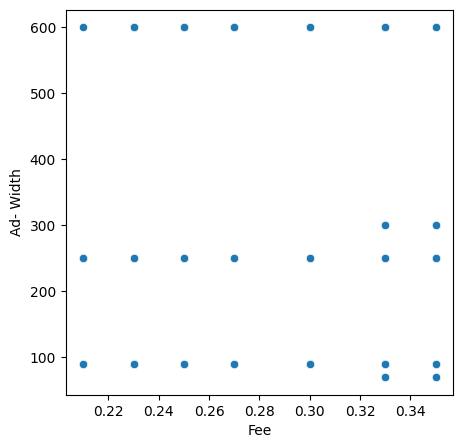

-----------------------------------------------------------------


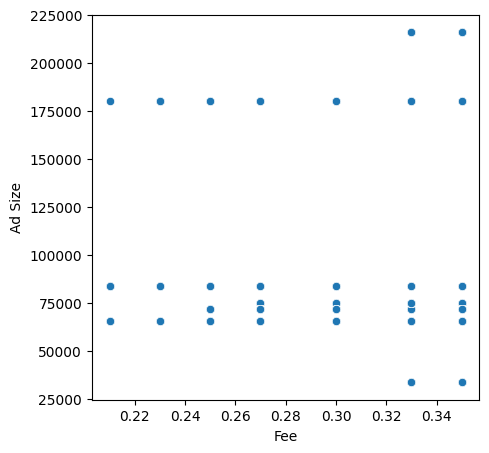

-----------------------------------------------------------------


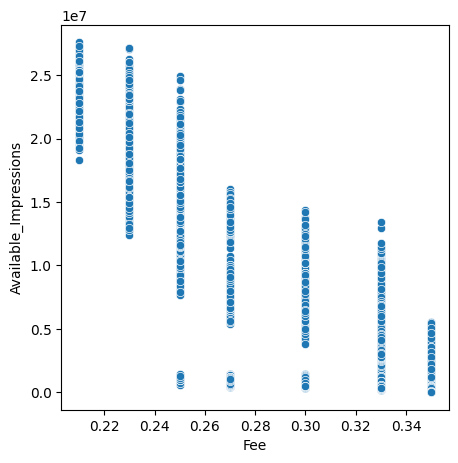

-----------------------------------------------------------------


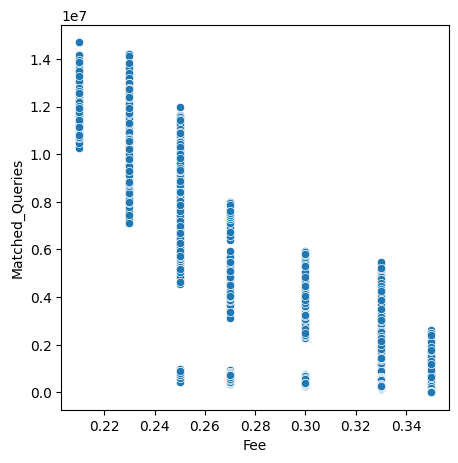

-----------------------------------------------------------------


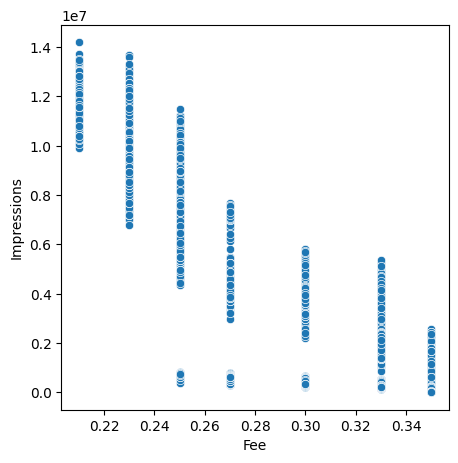

-----------------------------------------------------------------


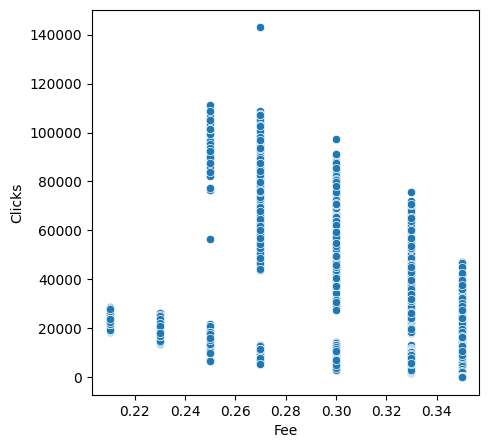

-----------------------------------------------------------------


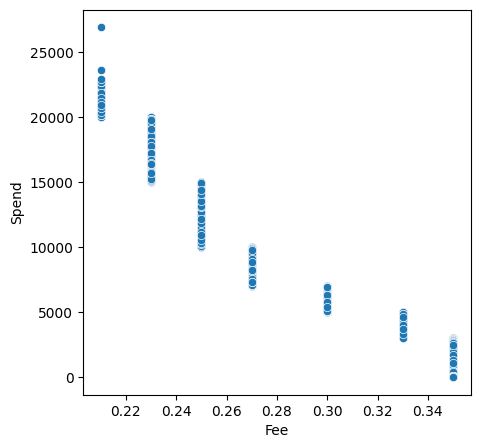

-----------------------------------------------------------------


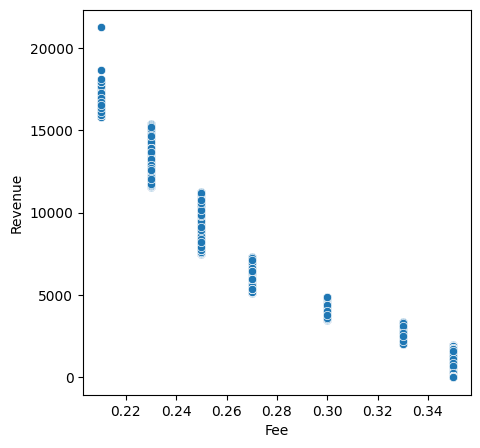

-----------------------------------------------------------------


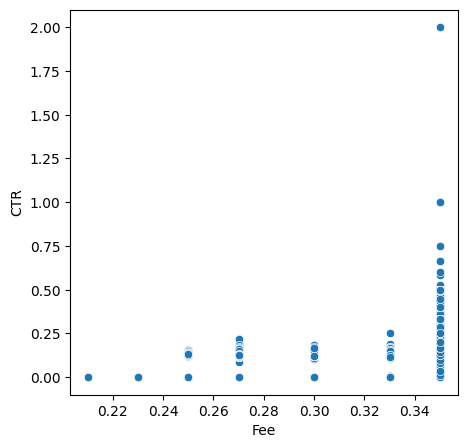

-----------------------------------------------------------------


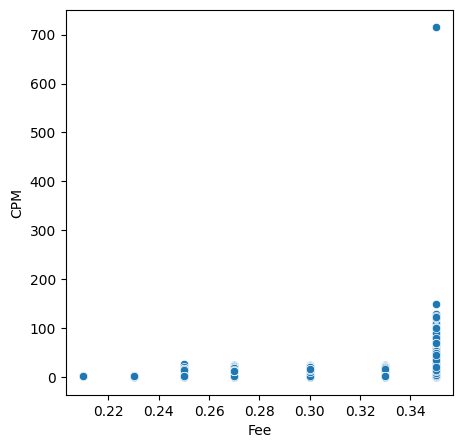

-----------------------------------------------------------------


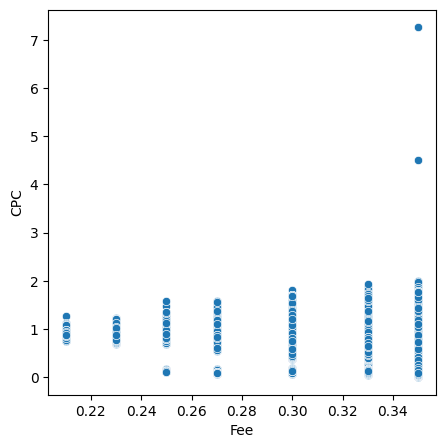

-----------------------------------------------------------------


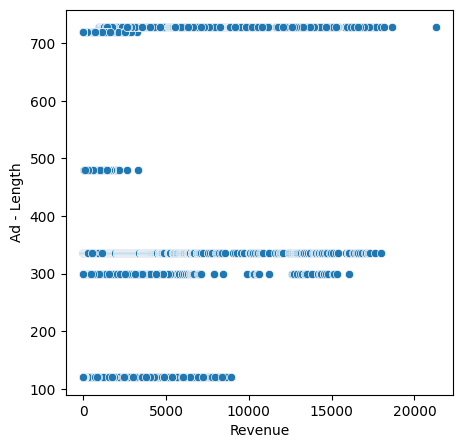

-----------------------------------------------------------------


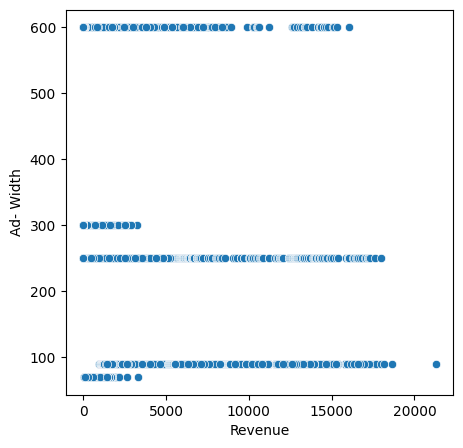

-----------------------------------------------------------------


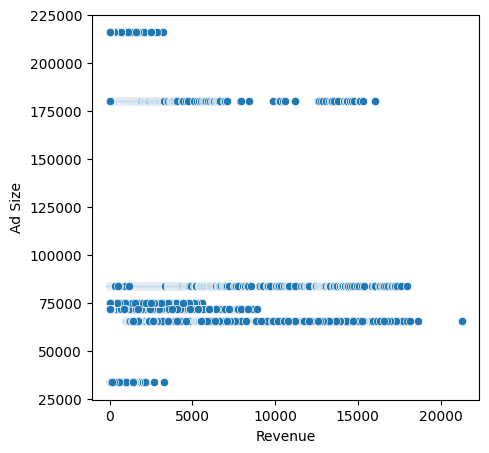

-----------------------------------------------------------------


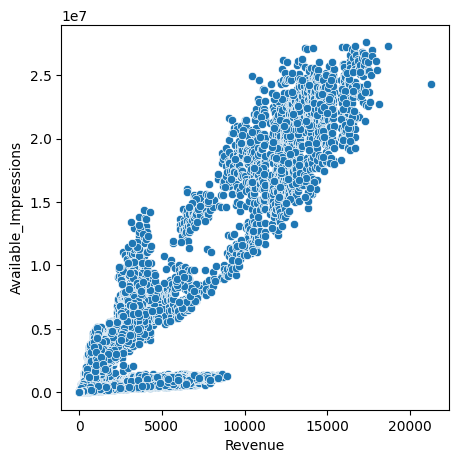

-----------------------------------------------------------------


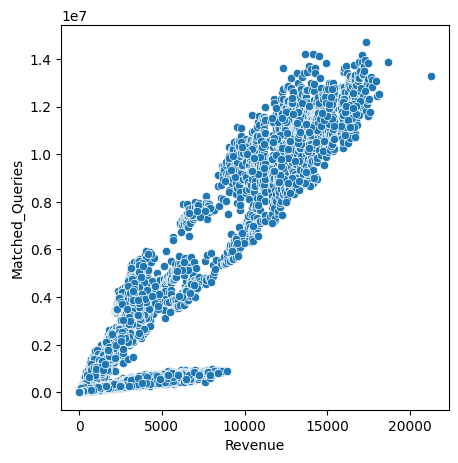

-----------------------------------------------------------------


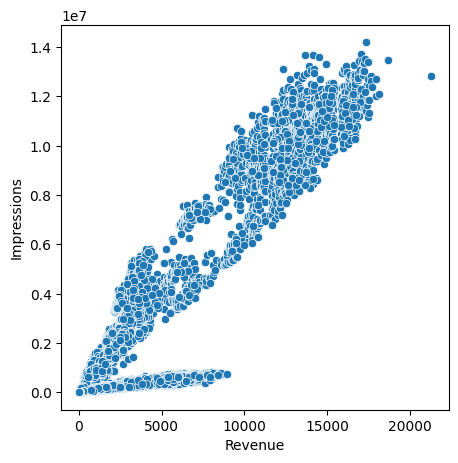

-----------------------------------------------------------------


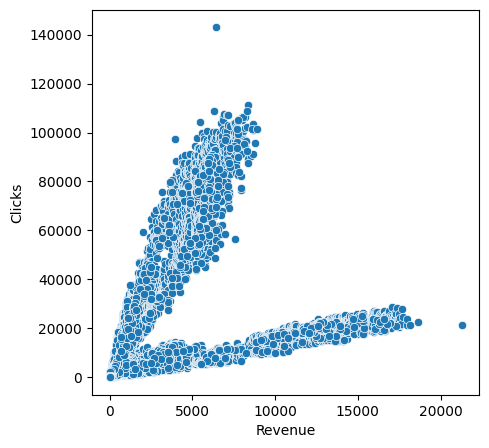

-----------------------------------------------------------------


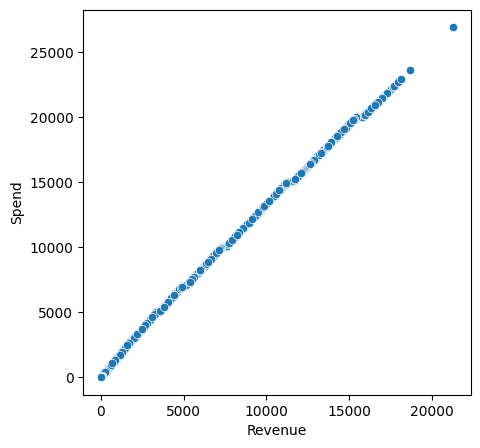

-----------------------------------------------------------------


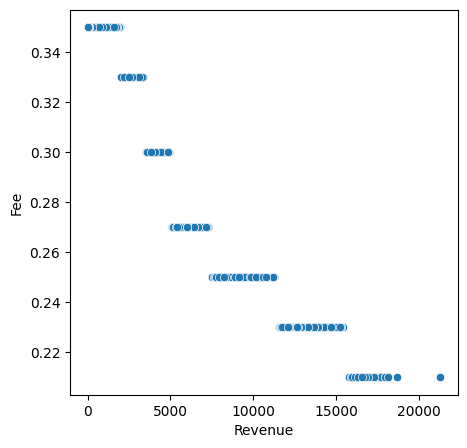

-----------------------------------------------------------------


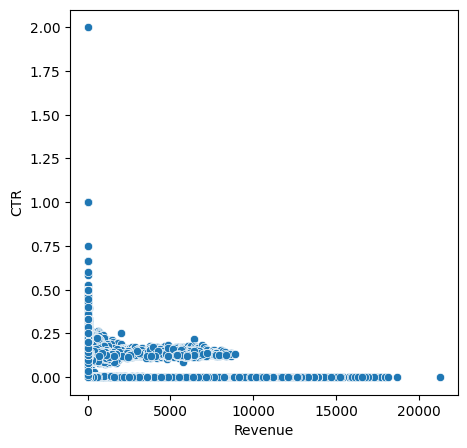

-----------------------------------------------------------------


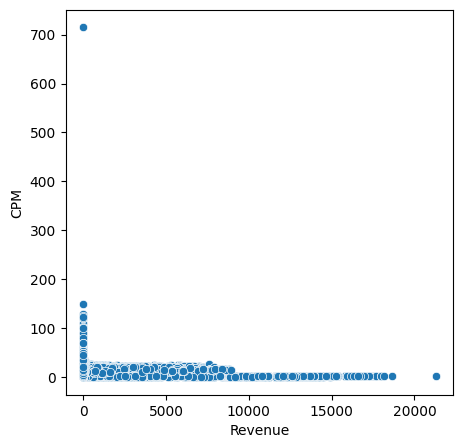

-----------------------------------------------------------------


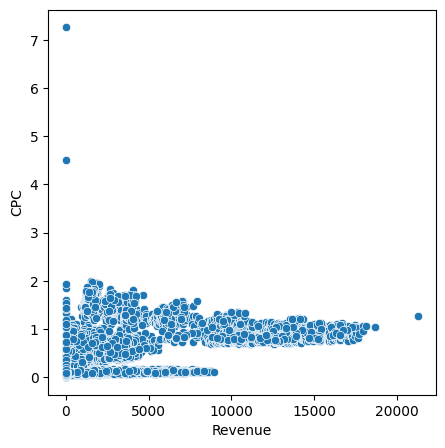

-----------------------------------------------------------------


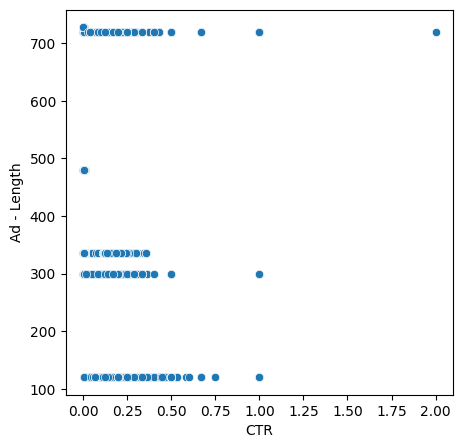

-----------------------------------------------------------------


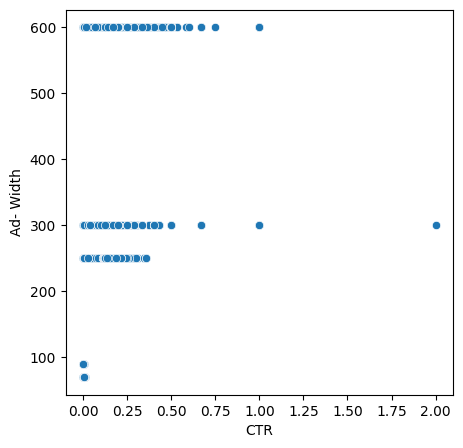

-----------------------------------------------------------------


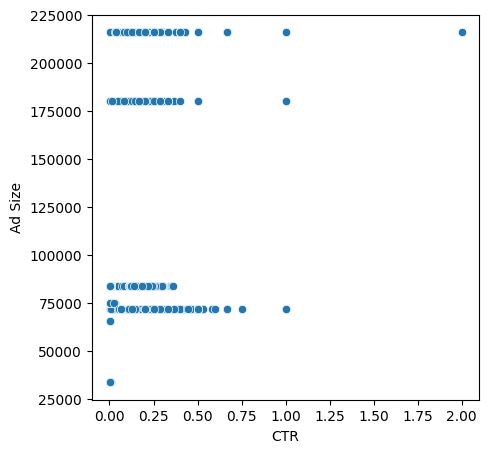

-----------------------------------------------------------------


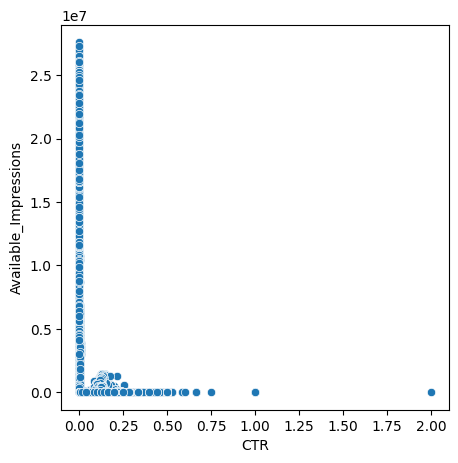

-----------------------------------------------------------------


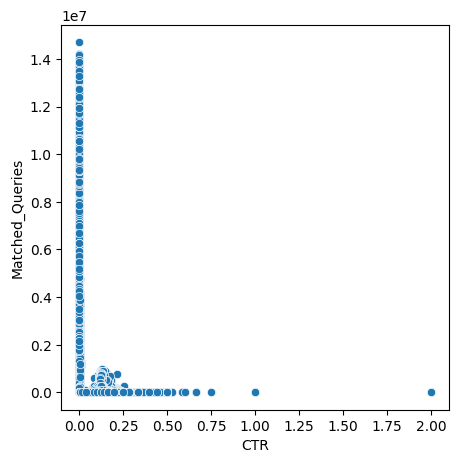

-----------------------------------------------------------------


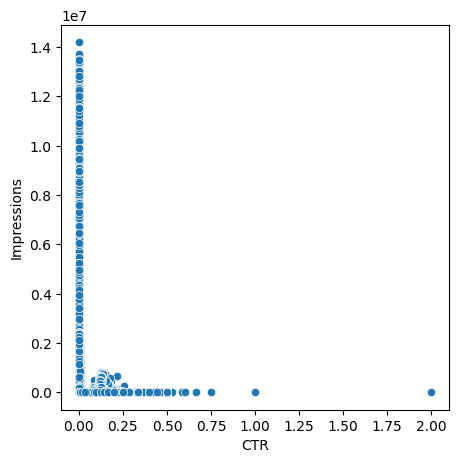

-----------------------------------------------------------------


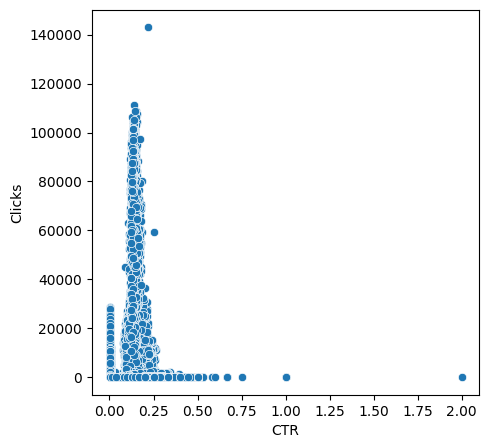

-----------------------------------------------------------------


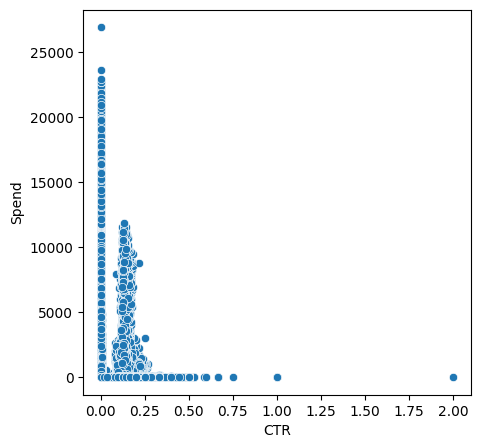

-----------------------------------------------------------------


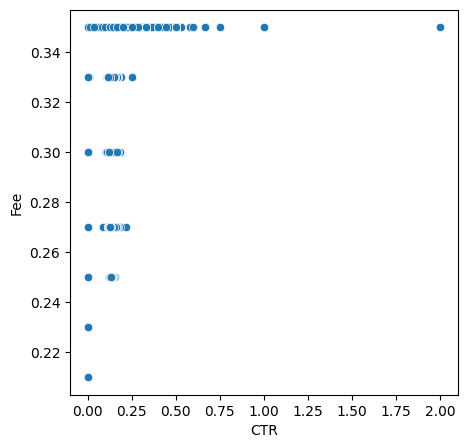

-----------------------------------------------------------------


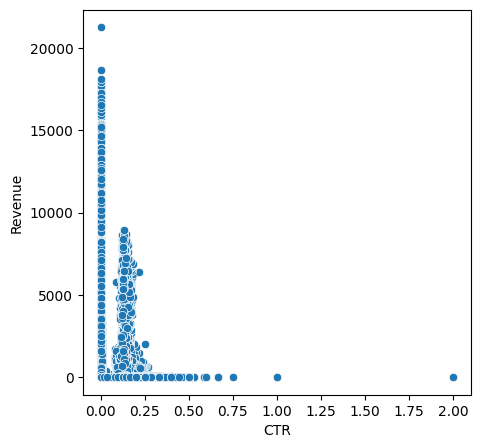

-----------------------------------------------------------------


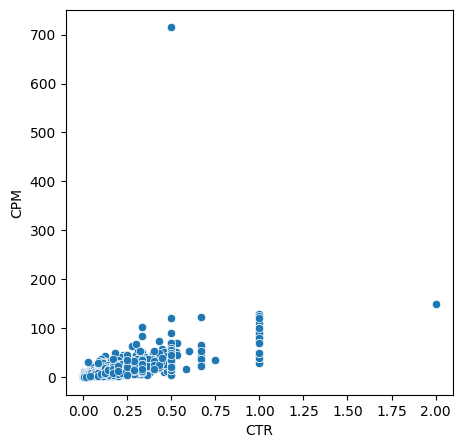

-----------------------------------------------------------------


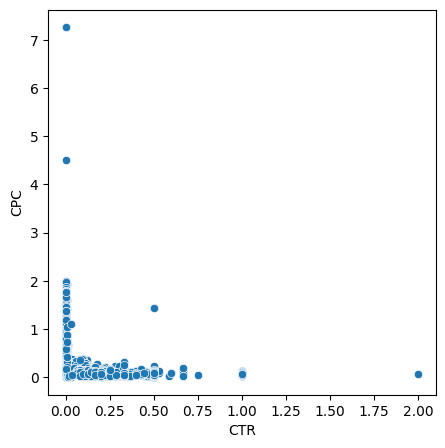

-----------------------------------------------------------------


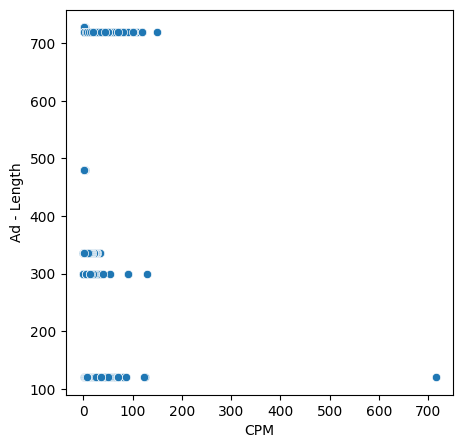

-----------------------------------------------------------------


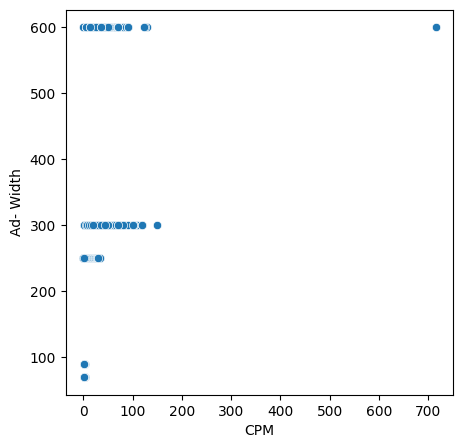

-----------------------------------------------------------------


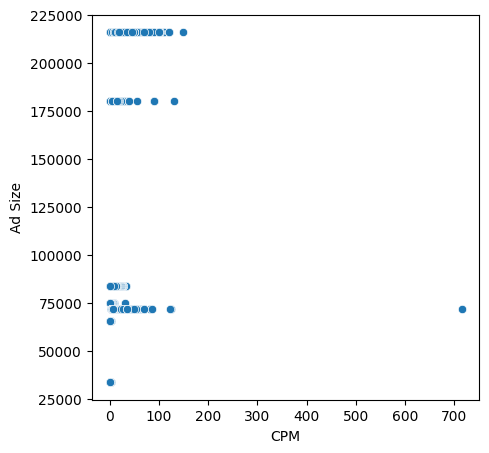

-----------------------------------------------------------------


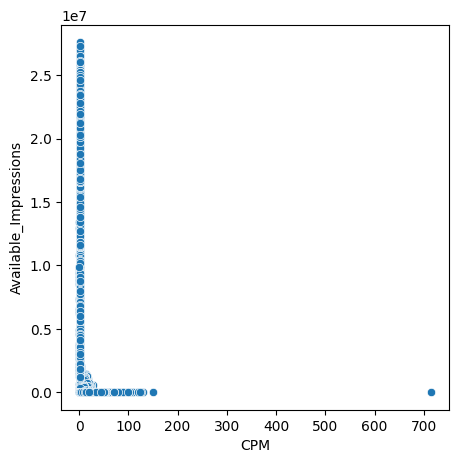

-----------------------------------------------------------------


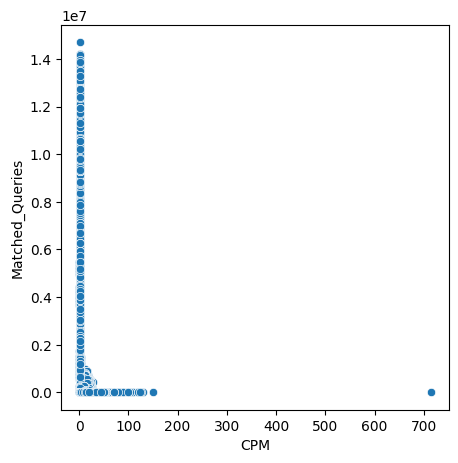

-----------------------------------------------------------------


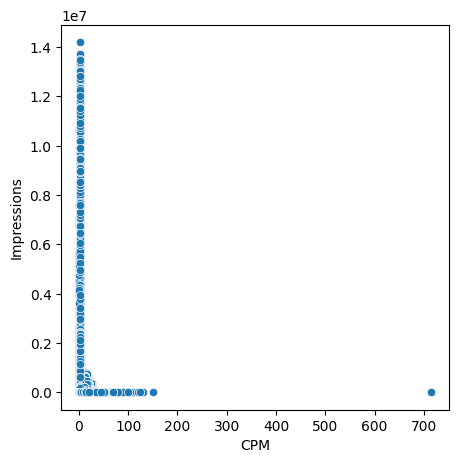

-----------------------------------------------------------------


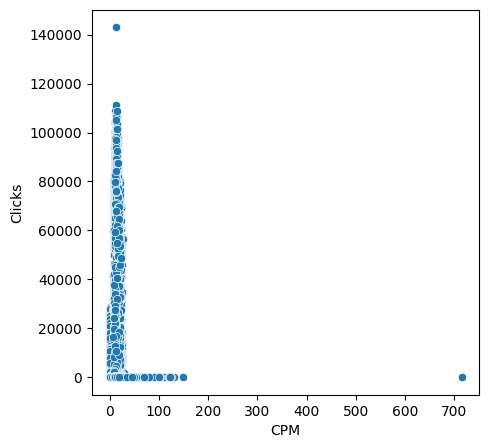

-----------------------------------------------------------------


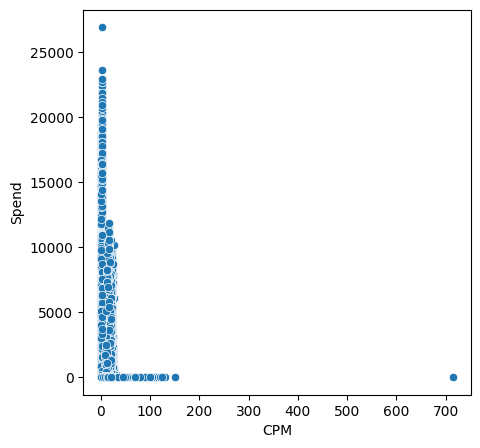

-----------------------------------------------------------------


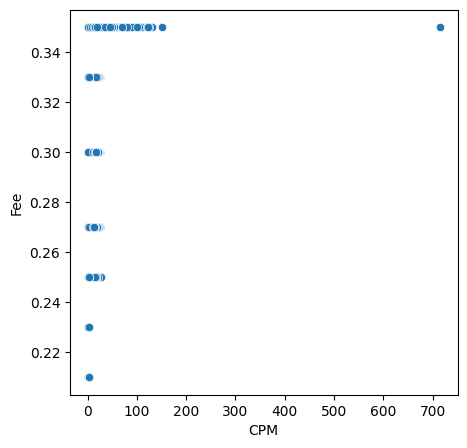

-----------------------------------------------------------------


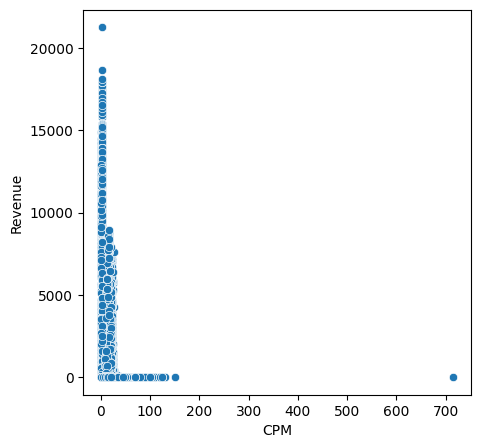

-----------------------------------------------------------------


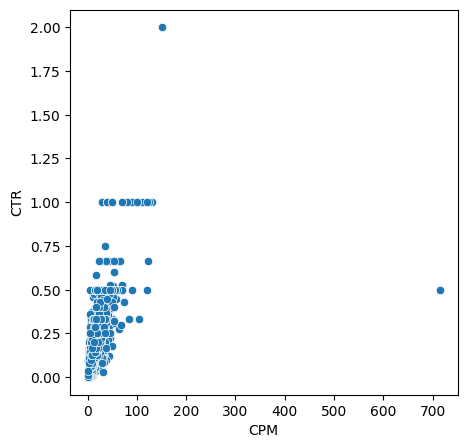

-----------------------------------------------------------------


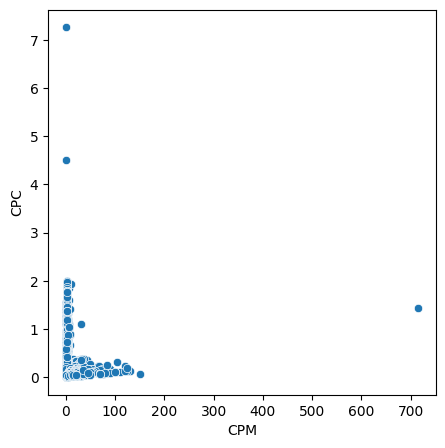

-----------------------------------------------------------------


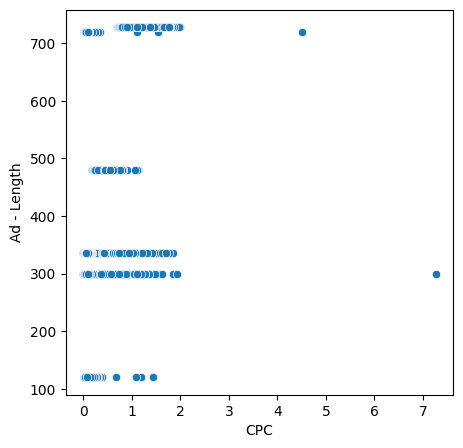

-----------------------------------------------------------------


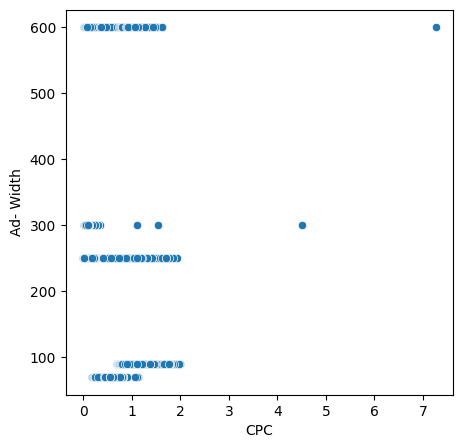

-----------------------------------------------------------------


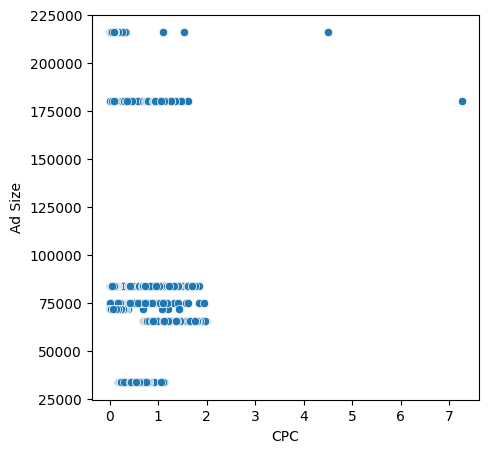

-----------------------------------------------------------------


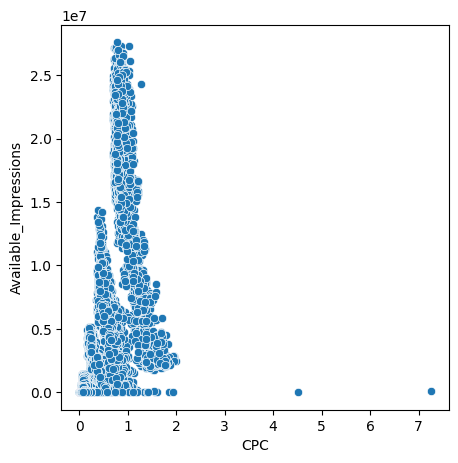

-----------------------------------------------------------------


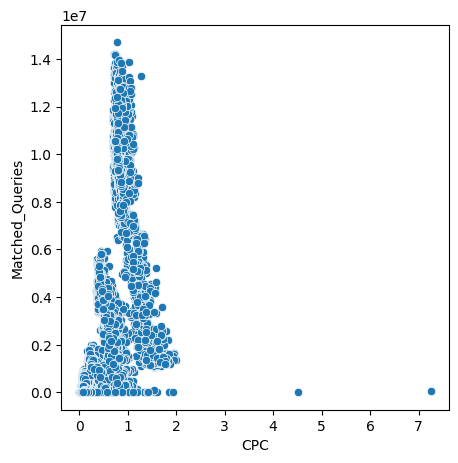

-----------------------------------------------------------------


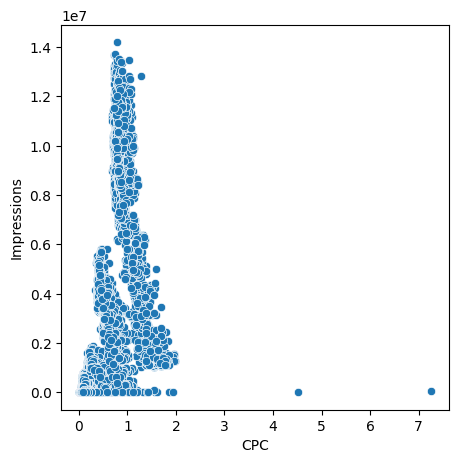

-----------------------------------------------------------------


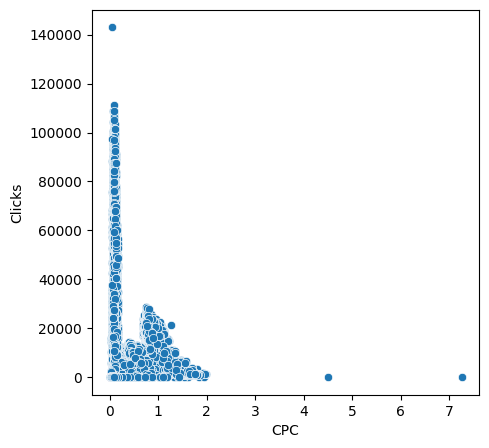

-----------------------------------------------------------------


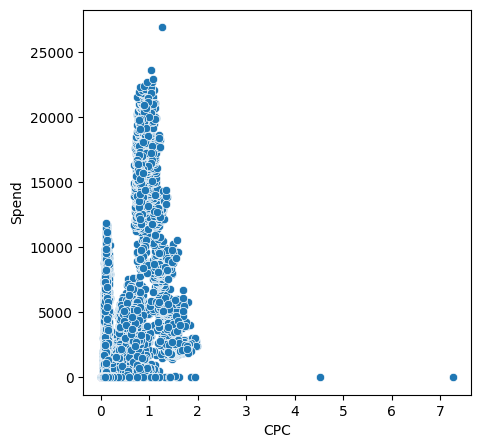

-----------------------------------------------------------------


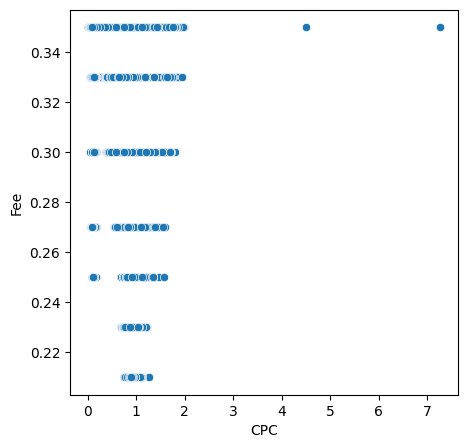

-----------------------------------------------------------------


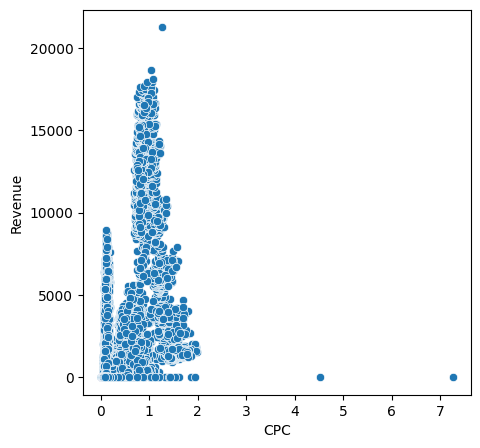

-----------------------------------------------------------------


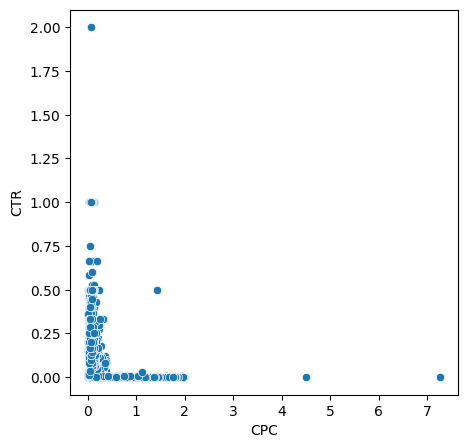

-----------------------------------------------------------------


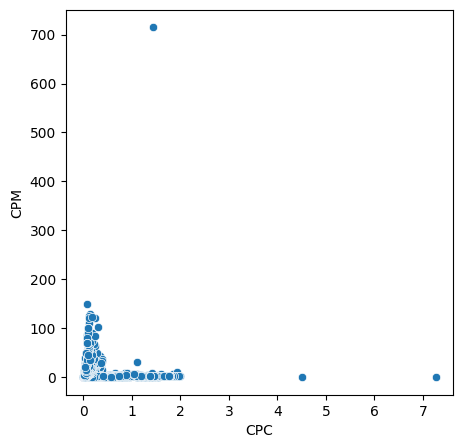

-----------------------------------------------------------------


In [ ]:
scatter(df1)

<Axes: >

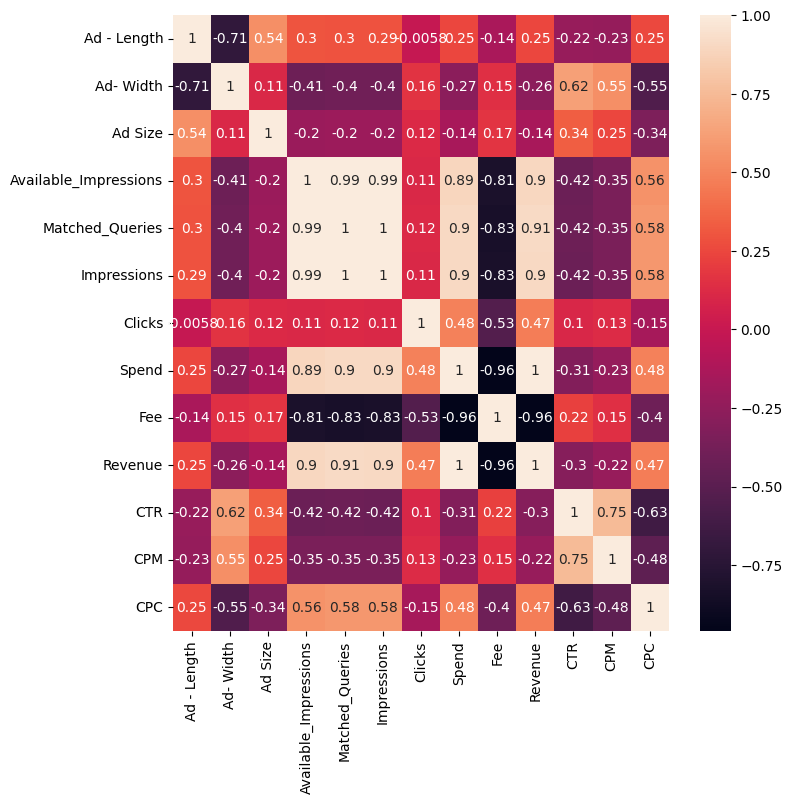

In [22]:
## Correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df1[numerical_col].corr(),annot=True)

### Analyzing Categorical columns

In [23]:
def cat_col_analysis(data):
    for i in categorical_col:
      if i != "Timestamp":
        unique = data[i].unique()
        print(f"In {i} column")
        print('--------------------------------------------------------------------------------------')
        print(f"Unique datapoints are {unique}")
        unique_count = data[i].value_counts()
        print(f"Count of unique data points are\n{unique_count}")
        plt.figure(figsize=(7,7))
        plt.pie(unique_count,labels=unique,autopct='%1.1f%%', startangle=140)
        plt.show()
        print("***************************************************************************************")

In InventoryType column
--------------------------------------------------------------------------------------
Unique datapoints are ['Format1' 'Format6' 'Format5' 'Format7' 'Format4' 'Format3' 'Format2']
Count of unique data points are
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64


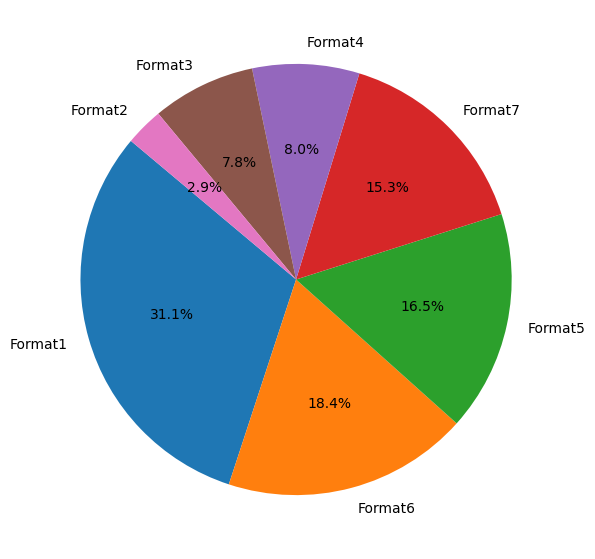

***************************************************************************************
In Ad Type column
--------------------------------------------------------------------------------------
Unique datapoints are ['Inter222' 'Inter227' 'Inter228' 'Inter217' 'Inter219' 'Inter221'
 'Inter223' 'Inter225' 'Inter229' 'Inter224' 'inter230' 'Inter226'
 'Inter220' 'Inter218']
Count of unique data points are
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int64


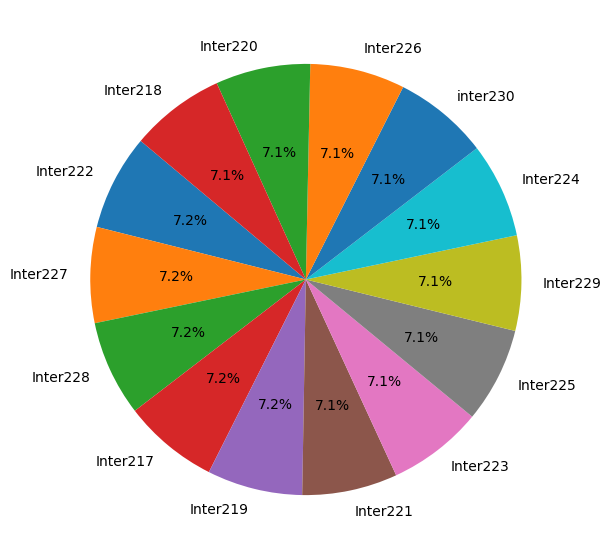

***************************************************************************************
In Platform column
--------------------------------------------------------------------------------------
Unique datapoints are ['Video' 'App' 'Web']
Count of unique data points are
Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64


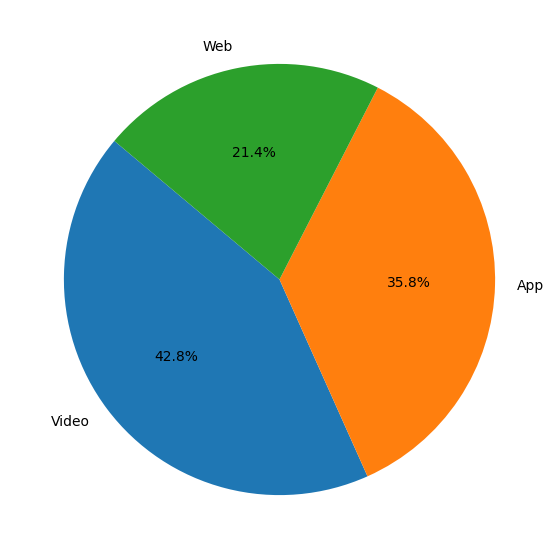

***************************************************************************************
In Device Type column
--------------------------------------------------------------------------------------
Unique datapoints are ['Desktop' 'Mobile']
Count of unique data points are
Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64


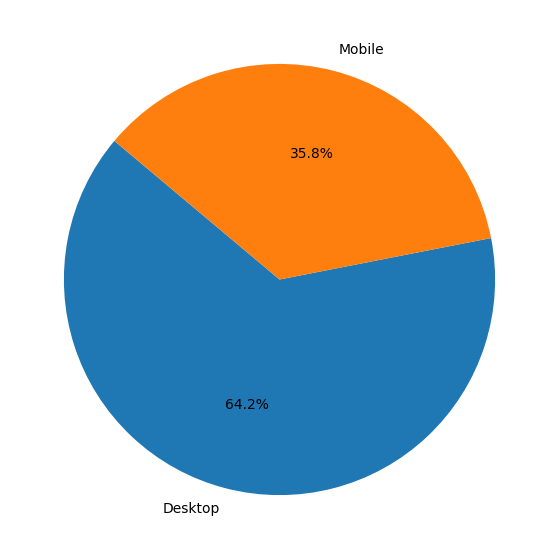

***************************************************************************************
In Format column
--------------------------------------------------------------------------------------
Unique datapoints are ['Display' 'Video']
Count of unique data points are
Video      11552
Display    11514
Name: Format, dtype: int64


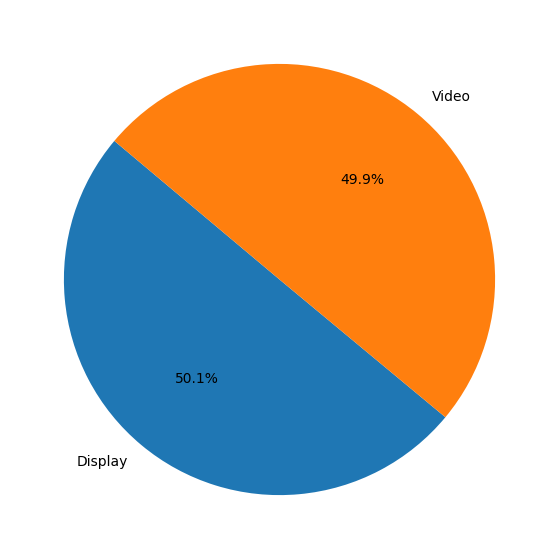

***************************************************************************************


In [24]:
cat_col_analysis(df1)

## Scalling numerical column data

In [25]:
!pip install sklearn


  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2951 sha256=d0300ec4614dee8faa5c2031045cd186968f7b7122244b432460ff147535df7a
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


In [26]:
from sklearn.preprocessing import StandardScaler   ## importing required library
scaler = StandardScaler(with_mean=True, with_std=True)

In [27]:
scaled_num_data = scaler.fit_transform(df1[numerical_col])


In [28]:
scaled_num_data = pd.DataFrame(scaled_num_data,columns = scaler.get_feature_names_out())

In [29]:
scaled_num_data

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0        -0.364496  -0.432797 -0.352218              -0.512407   
1        -0.364496  -0.432797 -0.352218              -0.512413   
2        -0.364496  -0.432797 -0.352218              -0.512213   
3        -0.364496  -0.432797 -0.352218              -0.512276   
4        -0.364496  -0.432797 -0.352218              -0.512531   
...            ...        ...       ...                    ...   
23061     1.433093  -0.186599  1.939086              -0.512788   
23062     1.433093  -0.186599  1.939086              -0.512787   
23063     1.433093  -0.186599  1.939086              -0.512788   
23064    -1.134891   1.290590 -0.400970              -0.512787   
23065     1.433093  -0.186599  1.939086              -0.512788   

       Matched_Queries  Impressions    Clicks     Spend       Fee   Revenue  \
0            -0.515248    -0.510918 -0.615311 -0.665372  0.465447 -0.619693   
1            -0.515264    -0.510933 -0.615311 -0.665372  0.465447 -0.619693   
2            -0.515235    -0.510905 -0.615311 -0.665372  0.465447 -0.619693   
3            -0.515179    -0.510847 -0.615311 -0.665372  0.465447 -0.619693   
4            -0.515281    -0.510951 -0.615311 -0.665372  0.465447 -0.619693   
...                ...          ...       ...       ...       ...       ...   
23061        -0.515377    -0.511050 -0.615311 -0.665355  0.465447 -0.619678   
23062        -0.515376    -0.511050 -0.615311 -0.665362  0.465447 -0.619684   
23063        -0.515377    -0.511050 -0.615311 -0.665360  0.465447 -0.619682   
23064        -0.515377    -0.511050 -0.615311 -0.665355  0.465447 -0.619678   
23065        -0.515376    -0.511050 -0.615311 -0.665350  0.465447 -0.619674   

            CTR       CPM       CPC  
0     -0.874551 -0.927110 -0.986603  
1     -0.870232 -0.927110 -0.986603  
2     -0.877790 -0.927110 -0.986603  
3     -0.886428 -0.927110 -0.986603  
4     -0.863754 -0.927110 -0.986603  
...         ...       ...       ...  
23061  9.888966  6.801816 -0.781459  
23062  4.490472  1.281155 -0.869378  
23063  9.888966  4.593551 -0.840072  
23064  9.888966  6.801816 -0.781459  
23065  4.490472  4.041485 -0.722846  

[23066 rows x 13 columns]

Scaling the data can have a significant impact on the speed of clustering algorithms. The effect of scaling depends on the specific algorithm, the scaling method used

1. **Convergence Speed:** Clustering algorithms often rely on distance calculations between data points or cluster centroids. Scaling the data ensures that features are on similar scales, which can lead to faster convergence. Algorithms like K-Means converge faster when the distances between data points are comparable, resulting in quicker updates of cluster centroids.

2. **Distance Calculations:** Many clustering algorithms involve distance-based calculations. Scaling the data can make these calculations more efficient. When features are on the same scale, distance computations become simpler and require fewer floating-point operations, which can speed up the algorithm's execution.

3. **Numerical Stability:** Scaling the data can improve numerical stability by reducing the risk of numerical precision issues. Algorithms might behave more consistently and converge faster when the data is scaled, particularly in cases where the algorithm involves iterative updates.

4. **Outlier Impact:** Scaling can reduce the impact of outliers on clustering results. Outliers can significantly affect the distances between data points, leading to slower convergence or the formation of distorted clusters. Scaling makes the algorithm less sensitive to extreme values.

5. **Efficient Memory Usage:** Algorithms that involve large distance matrices or similarity matrices (e.g., hierarchical clustering) can benefit from scaling. Smaller feature ranges lead to more efficient memory usage and faster matrix computations.

6. **Algorithm Sensitivity:** Some clustering algorithms are more sensitive to feature scaling than others. For example, K-Means and hierarchical clustering often benefit from scaling, while density-based algorithms like DBSCAN are less sensitive to scaling due to their local density approach.

7. **Preprocessing Overhead:** While scaling can improve algorithm speed, there might be a slight overhead associated with data preprocessing. However, this preprocessing overhead is usually small compared to the potential speed improvements gained during algorithm execution.


In [30]:
df2 = pd.concat([df1[categorical_col],scaled_num_data],axis=1)

In [31]:
df2.head()

Timestamp InventoryType   Ad Type Platform Device Type   Format  \
0  2020-9-2-17       Format1  Inter222    Video     Desktop  Display   
1  2020-9-2-10       Format1  Inter227      App      Mobile    Video   
2  2020-9-1-22       Format1  Inter222    Video     Desktop  Display   
3  2020-9-3-20       Format1  Inter228    Video      Mobile    Video   
4  2020-9-4-15       Format1  Inter217      Web     Desktop    Video   

   Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.352218              -0.512407        -0.515248   
1    -0.364496  -0.432797 -0.352218              -0.512413        -0.515264   
2    -0.364496  -0.432797 -0.352218              -0.512213        -0.515235   
3    -0.364496  -0.432797 -0.352218              -0.512276        -0.515179   
4    -0.364496  -0.432797 -0.352218              -0.512531        -0.515281   

   Impressions    Clicks     Spend       Fee   Revenue       CTR      CPM  \
0    -0.510918 -0.615311 -0.665372  0.465447 -0.619693 -0.874551 -0.92711   
1    -0.510933 -0.615311 -0.665372  0.465447 -0.619693 -0.870232 -0.92711   
2    -0.510905 -0.615311 -0.665372  0.465447 -0.619693 -0.877790 -0.92711   
3    -0.510847 -0.615311 -0.665372  0.465447 -0.619693 -0.886428 -0.92711   
4    -0.510951 -0.615311 -0.665372  0.465447 -0.619693 -0.863754 -0.92711   

        CPC  
0 -0.986603  
1 -0.986603  
2 -0.986603  
3 -0.986603  
4 -0.986603

### Clustering using numerical columns data

>> Hirerachial Clusterring

In [32]:
scaled_num_data.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.352218              -0.512407        -0.515248   
1    -0.364496  -0.432797 -0.352218              -0.512413        -0.515264   
2    -0.364496  -0.432797 -0.352218              -0.512213        -0.515235   
3    -0.364496  -0.432797 -0.352218              -0.512276        -0.515179   
4    -0.364496  -0.432797 -0.352218              -0.512531        -0.515281   

   Impressions    Clicks     Spend       Fee   Revenue       CTR      CPM  \
0    -0.510918 -0.615311 -0.665372  0.465447 -0.619693 -0.874551 -0.92711   
1    -0.510933 -0.615311 -0.665372  0.465447 -0.619693 -0.870232 -0.92711   
2    -0.510905 -0.615311 -0.665372  0.465447 -0.619693 -0.877790 -0.92711   
3    -0.510847 -0.615311 -0.665372  0.465447 -0.619693 -0.886428 -0.92711   
4    -0.510951 -0.615311 -0.665372  0.465447 -0.619693 -0.863754 -0.92711   

        CPC  
0 -0.986603  
1 -0.986603  
2 -0.986603  
3 -0.986603  
4 -0.986603

In [33]:
## importing required library

import scipy.cluster.hierarchy as sc

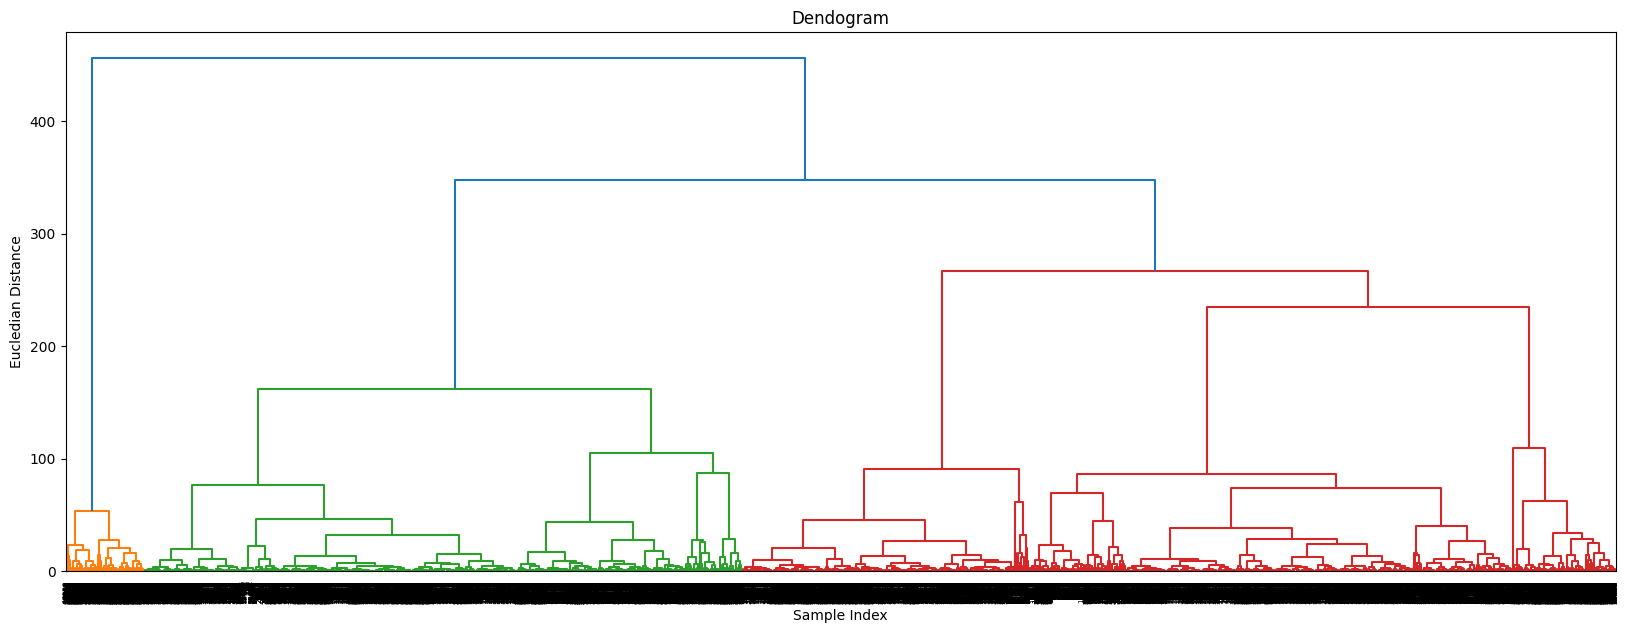

In [34]:
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(np.array(scaled_num_data),method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')
plt.show()

##### From dendogram optimal number of cluster is found to be: 2

In [35]:
## Hirerachial clustering -> Agglomerative Clusterring

from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(np.array(scaled_num_data))

AgglomerativeClustering(affinity='euclidean')

In [36]:
print(cluster.labels_)

[0 0 0 ... 0 0 0]


In [37]:
## silhouette score
from sklearn.metrics import silhouette_score

In [38]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(np.array(scaled_num_data))
    score = silhouette_score(np.array(scaled_num_data), agglo.labels_)
    silhouette_coefficients.append(score)

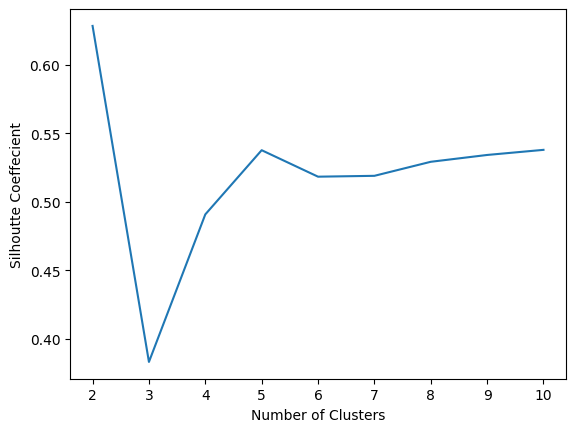

In [39]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

* From above garph we can see that optimal number of clusterring is 2

>> K-mean clusteering

In [40]:
from sklearn.cluster import KMeans

In [41]:
## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(np.array(scaled_num_data))
    wcss.append(kmeans.inertia_)

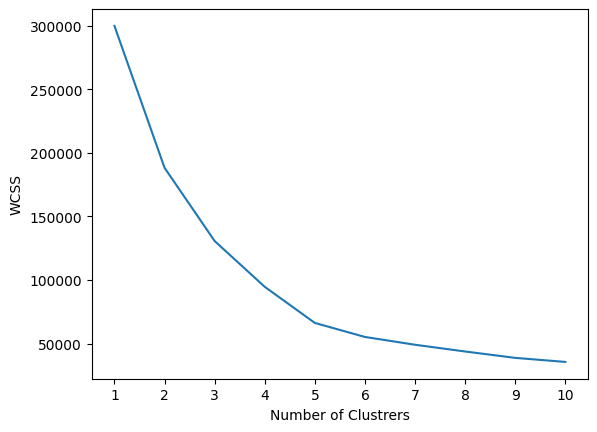

In [42]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

* Optimal number of clusters from K-mean clusttering method is 5.

In [43]:
cols = ['Clicks','Spend','Revenue','CTR','CPM','CPC']

Silhouette score for 2 clusters is 0.4259343060431237
Silhouette score for 3 clusters is 0.4934868095496981
Silhouette score for 4 clusters is 0.5392022631219152
Silhouette score for 5 clusters is 0.5009132137263818
Silhouette score for 6 clusters is 0.49700172643339396
Silhouette score for 7 clusters is 0.5044238250529215
Silhouette score for 8 clusters is 0.41039067196259704
Silhouette score for 9 clusters is 0.47978670643082316
Silhouette score for 10 clusters is 0.45100629267413245


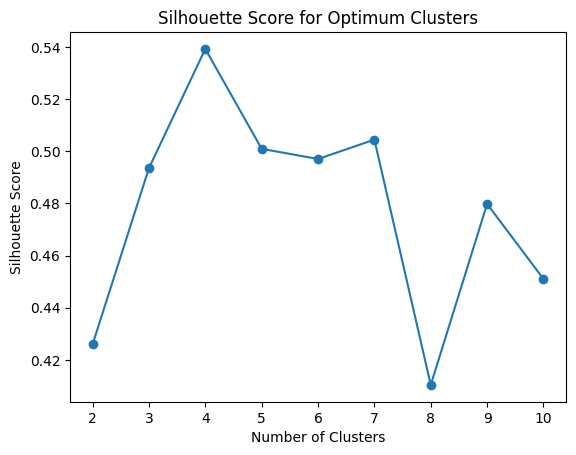

In [44]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df2[cols])
    sill_score = silhouette_score(df2[cols], cluster_labels)
    silhouette_scores.append(sill_score)
    print(f"Silhouette score for {n_clusters} clusters is {sill_score}")


plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimum Clusters')
plt.show()



In [45]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df2['Cluster'] = kmeans.fit_predict(df2[cols])

In [46]:
df2['Cluster']

0        3
1        3
2        3
3        3
4        3
        ..
23061    0
23062    0
23063    0
23064    0
23065    0
Name: Cluster, Length: 23066, dtype: int32

In [47]:
df2.columns

Index(['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type',
       'Format', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks',
       'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC', 'Cluster'],
      dtype='object')

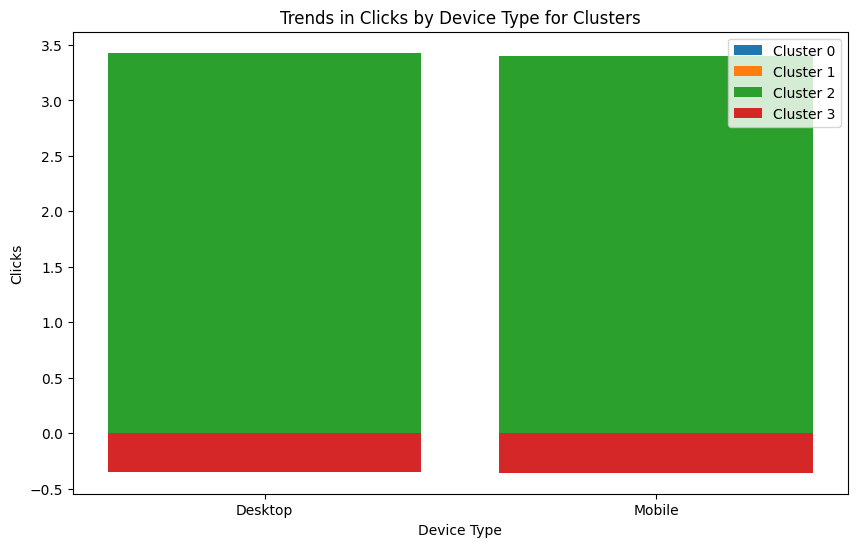

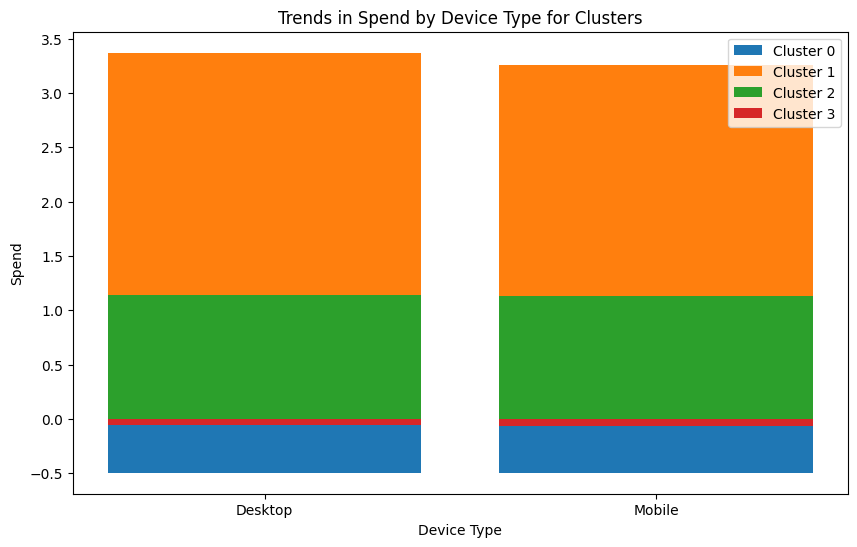

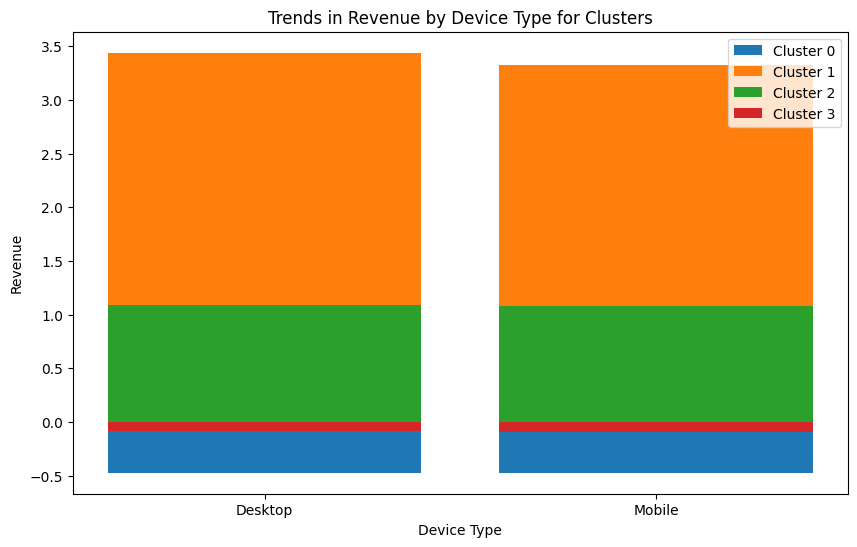

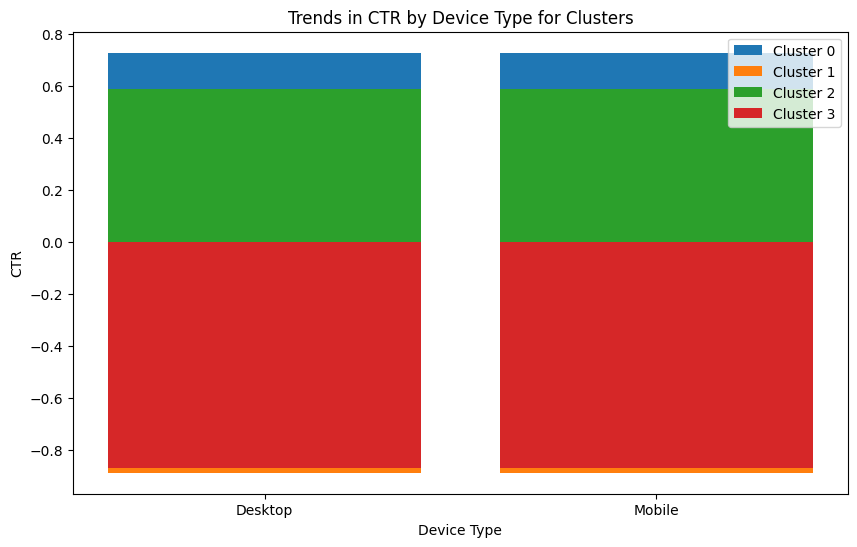

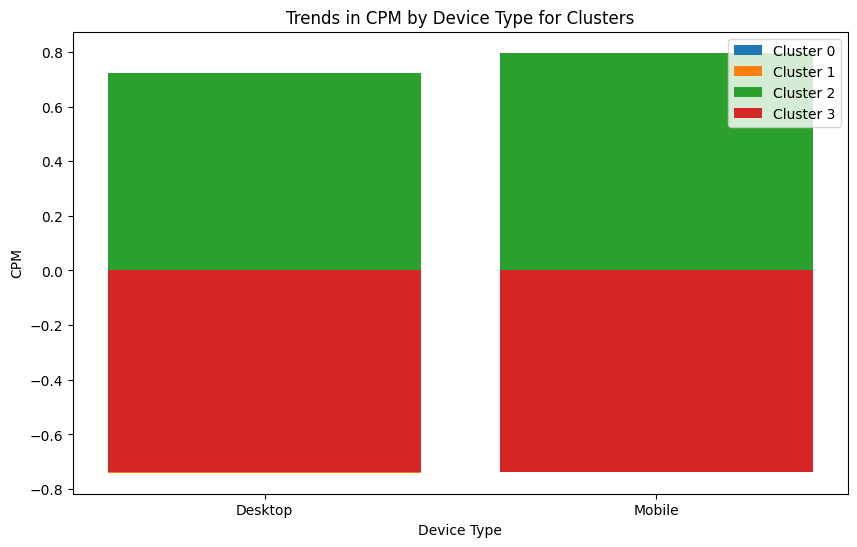

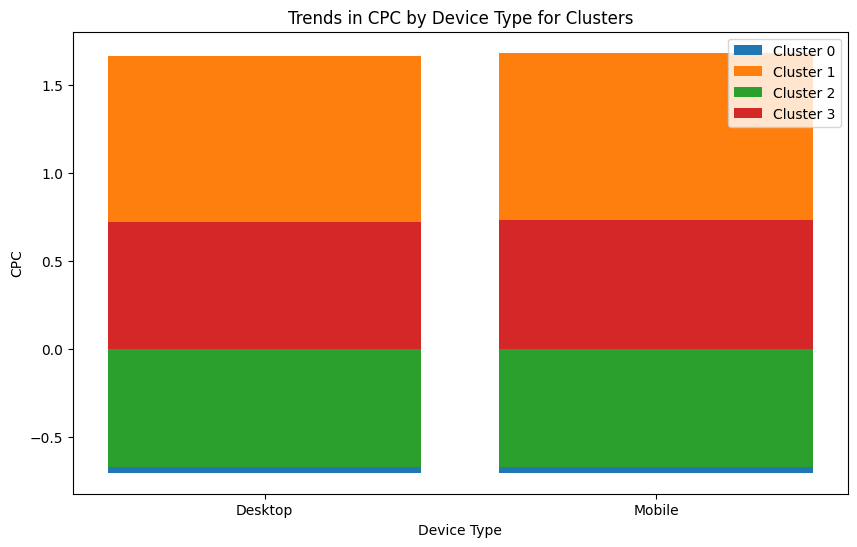

In [48]:
import pandas as pd

cluster_device_profile = df2.groupby(['Cluster', 'Device Type'])[cols].mean()
cluster_device_profile = cluster_device_profile.reset_index()

# Create bar plots
for metric in cols:
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_data = cluster_device_profile[cluster_device_profile['Cluster'] == cluster]
        plt.bar(cluster_data['Device Type'], cluster_data[metric], label=f'Cluster {cluster}')
    plt.xlabel('Device Type')
    plt.ylabel(metric)
    plt.title(f'Trends in {metric} by Device Type for Clusters')
    plt.legend()
    plt.show()


1. Average clicks in Cluster 2 is highest for both Desktop and Mobile device type
2. Average Spend in Cluster 1 is highest for both Desktop and Mobile device type
3. Average Revenue in Cluster 1 is highest for both Desktop and Mobile device type
4. Average CTR in Cluster 3 is highest for both Desktop and Mobile device type
5. Average CPM in Cluster 2 and 3 is highest for both Desktop and Mobile device type
6. Average CPC in Cluster 1 is highest for both Desktop and Mobile device type
